# Customer Retention Project

In [146]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import warnings
import os
import scipy as stats
from sklearn.preprocessing import LabelEncoder

# Loading the dataset

In [147]:
df=pd.read_excel("C:/Users/MohitLewis/Desktop/Customer_retention_dataset/customer_retention_dataset.xlsx")

In [148]:
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [149]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

# Exploratory Data Analysis:

In [150]:
df.shape

(269, 71)

In [151]:
# Renaming the column names for better understanding
columns = ['Gender','Age','Shopping_City','Pincode','Shopping_Since','Shopping_Frequency','Internet_Accessibility','Device_Used',
           'Screen_Size','OS', 'Browser_Used','Channel_First_Used','Login_Mode','Time_Explored','Payment_Mode','Abandon_Frequency',
          'Abandon_Reason','Content_Readability','Similar_Product_Info','Seller_Product_Info','Product_Info_Clarity','Navigation_Ease',
          'Loading_Processing_Speed','User_Friendly_Interface','Convenient_Payment_Mode','Timely_Fulfilment_Trust','Customer_Support_Response',
          'Customer_Privacy_Guarantee','Various_Channel_Responses','Benefits','Enjoy','Convenience','Return_Replacement_Policy','Loyalty_Programs_Access',
          'Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Product_Several_Category','Relevant_Product_Info','Monetary_Savings',
          'Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Role_Fulfilment','Money_Worthy','Shopped_From','Easy_Web_App',
           'Visually_Appealing_WebApp','Product_Variety','Complete_Product_Info','Fast_WebApp','Reliable_WebApp','Quick_Purchase','Payment_Options_Availability',
           'Fast_Delivery','Customer_Privacy_Info','Financial_Security_Info','Perceived_Trustworthiness','Multichannel_Assistance','Long_Login_Time','Long_Display_Time',
           'Late_Price_Declare','Long_Loading_Time','Limited_Payment_Mode','Late_Delivery','WebApp_Design_Change','Page_Disruption','WebApp_Efficiency',
           'Recommendation']

df.columns = columns

In [152]:
# Checking the new column names after renaming them
df.columns

Index(['Gender', 'Age', 'Shopping_City', 'Pincode', 'Shopping_Since',
       'Shopping_Frequency', 'Internet_Accessibility', 'Device_Used',
       'Screen_Size', 'OS', 'Browser_Used', 'Channel_First_Used', 'Login_Mode',
       'Time_Explored', 'Payment_Mode', 'Abandon_Frequency', 'Abandon_Reason',
       'Content_Readability', 'Similar_Product_Info', 'Seller_Product_Info',
       'Product_Info_Clarity', 'Navigation_Ease', 'Loading_Processing_Speed',
       'User_Friendly_Interface', 'Convenient_Payment_Mode',
       'Timely_Fulfilment_Trust', 'Customer_Support_Response',
       'Customer_Privacy_Guarantee', 'Various_Channel_Responses', 'Benefits',
       'Enjoy', 'Convenience', 'Return_Replacement_Policy',
       'Loyalty_Programs_Access', 'Info_Satisfaction',
       'Site_Quality_Satisfaction', 'Net_Benefit_Satisfaction', 'Trust',
       'Product_Several_Category', 'Relevant_Product_Info', 'Monetary_Savings',
       'Patronizing_Convenience', 'Adventure_Sense', 'Social_Status',
      

In [153]:
df.head()

Gender          Age  Shopping_City  Pincode Shopping_Since  \
0    Male  31-40 years          Delhi   110009  Above 4 years   
1  Female  21-30 years          Delhi   110030  Above 4 years   
2  Female  21-30 years  Greater Noida   201308      3-4 years   
3    Male  21-30 years        Karnal    132001      3-4 years   
4  Female  21-30 years     Bangalore    530068      2-3 years   

   Shopping_Frequency Internet_Accessibility Device_Used Screen_Size  \
0         31-40 times                Dial-up     Desktop      Others   
1  41 times and above                  Wi-Fi  Smartphone  4.7 inches   
2  41 times and above        Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times        Mobile Internet  Smartphone  5.5 inches   
4         11-20 times                  Wi-Fi  Smartphone  4.7 inches   

                      OS  ...          Long_Login_Time  \
0  Window/windows Mobile  ...                Amazon.in   
1                IOS/Mac  ...  Amazon.in, Flipkart.com   
2                Android  ...               Myntra.com   
3                IOS/Mac  ...             Snapdeal.com   
4                IOS/Mac  ...  Flipkart.com, Paytm.com   

          Long_Display_Time Late_Price_Declare Long_Loading_Time  \
0                 Amazon.in       Flipkart.com      Flipkart.com   
1                Myntra.com       snapdeal.com      Snapdeal.com   
2                Myntra.com         Myntra.com        Myntra.com   
3  Myntra.com, Snapdeal.com         Myntra.com         Paytm.com   
4                 Paytm.com          Paytm.com         Paytm.com   

  Limited_Payment_Mode Late_Delivery     WebApp_Design_Change  \
0            Amazon.in     Paytm.com             Flipkart.com   
1         Snapdeal.com  Snapdeal.com                Amazon.in   
2            Amazon.in     Paytm.com                Paytm.com   
3            Paytm.com     Paytm.com  Amazon.in, Flipkart.com   
4         Snapdeal.com     Paytm.com                Amazon.in   

           Page_Disruption                   WebApp_Efficiency  \
0                Amazon.in                           Amazon.in   
1               Myntra.com             Amazon.in, Flipkart.com   
2                Paytm.com                           Amazon.in   
3  Amazon.in, Flipkart.com  Amazon.in, Flipkart.com, Paytm.com   
4             Snapdeal.com                           Paytm.com   

                     Recommendation  
0                      Flipkart.com  
1             Amazon.in, Myntra.com  
2  Amazon.in, Paytm.com, Myntra.com  
3           Amazon.in, Flipkart.com  
4             Amazon.in, Myntra.com  

[5 rows x 71 columns]

In [154]:
df.tail()

Gender                 Age Shopping_City  Pincode Shopping_Since  \
264  Female         21-30 years         Solan   173212      1-2 years   
265  Female         31-40 years     Ghaziabad   201008      1-2 years   
266  Female         41-50 yaers    Bangalore    560010      2-3 years   
267  Female  Less than 20 years         Solan   173229      2-3 years   
268  Female         41-50 yaers     Ghaziabad   201009      2-3 years   

     Shopping_Frequency Internet_Accessibility Device_Used Screen_Size  \
264  Less than 10 times        Mobile Internet  Smartphone  5.5 inches   
265         31-40 times        Mobile Internet  Smartphone      Others   
266  Less than 10 times        Mobile internet      Laptop      Others   
267  Less than 10 times                  Wi-Fi  Smartphone  5.5 inches   
268         31-40 times        Mobile Internet  Smartphone  5.5 inches   

                        OS  ... Long_Login_Time  \
264                Android  ...       Amazon.in   
265                Android  ...    Flipkart.com   
266  Window/windows Mobile  ...       Amazon.in   
267                Android  ...       Amazon.in   
268                Android  ...       Amazon.in   

                       Long_Display_Time Late_Price_Declare  \
264                            Amazon.in          Amazon.in   
265                         Flipkart.com       Flipkart.com   
266                         Snapdeal.com          Amazon.in   
267  Amazon.in, Myntra.com, Snapdeal.com          Amazon.in   
268                            Amazon.in          Amazon.in   

           Long_Loading_Time Limited_Payment_Mode Late_Delivery  \
264                Amazon.in            Amazon.in     Amazon.in   
265             Flipkart.com         Flipkart.com  Flipkart.com   
266             Snapdeal.com         Snapdeal.com  Snapdeal.com   
267  Amazon.in, Snapdeal.com            Amazon.in     Amazon.in   
268                Amazon.in            Amazon.in     Amazon.in   

    WebApp_Design_Change           Page_Disruption         WebApp_Efficiency  \
264            Amazon.in                 Amazon.in                 Amazon.in   
265         Flipkart.com              Flipkart.com              Flipkart.com   
266         Snapdeal.com              Snapdeal.com                 Amazon.in   
267            Amazon.in  Myntra.com, Snapdeal.com  Myntra.com, Snapdeal.com   
268            Amazon.in                 Amazon.in                 Amazon.in   

    Recommendation  
264      Amazon.in  
265   Flipkart.com  
266      Amazon.in  
267      Amazon.in  
268      Amazon.in  

[5 rows x 71 columns]

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        269 non-null    object
 1   Age                           269 non-null    object
 2   Shopping_City                 269 non-null    object
 3   Pincode                       269 non-null    int64 
 4   Shopping_Since                269 non-null    object
 5   Shopping_Frequency            269 non-null    object
 6   Internet_Accessibility        269 non-null    object
 7   Device_Used                   269 non-null    object
 8   Screen_Size                   269 non-null    object
 9   OS                            269 non-null    object
 10  Browser_Used                  269 non-null    object
 11  Channel_First_Used            269 non-null    object
 12  Login_Mode                    269 non-null    object
 13  Time_Explored       

In [156]:
#checking the datatype of each feature
df.dtypes

Gender                  object
Age                     object
Shopping_City           object
Pincode                  int64
Shopping_Since          object
                         ...  
Late_Delivery           object
WebApp_Design_Change    object
Page_Disruption         object
WebApp_Efficiency       object
Recommendation          object
Length: 71, dtype: object

In [157]:
#checking null count for each column
df.isnull().sum()

Gender                  0
Age                     0
Shopping_City           0
Pincode                 0
Shopping_Since          0
                       ..
Late_Delivery           0
WebApp_Design_Change    0
Page_Disruption         0
WebApp_Efficiency       0
Recommendation          0
Length: 71, dtype: int64

In [158]:
df.isnull().sum().sum()

0

In [159]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

No of Unique Values
Gender                                  2
Age                                     5
Shopping_City                          11
Pincode                                39
Shopping_Since                          5
...                                   ...
Late_Delivery                           6
WebApp_Design_Change                    7
Page_Disruption                         8
WebApp_Efficiency                       8
Recommendation                          8

[71 rows x 1 columns]

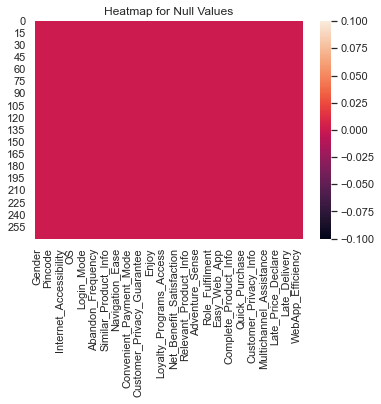

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

In [160]:
#visualizing the null count with heatmap
sns.heatmap(df.isnull())
plt.title("Heatmap for Null Values")
plt.show()
plt.figure(figsize=(25,10))

In [161]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*100)

Female    181
Male       88
Name: Gender, dtype: int64
****************************************************************************************************
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
****************************************************************************************************
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Shopping_City, dtype: int64
****************************************************************************************************
201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
20100

In [162]:
tabel=[]

for i in df.columns:
    tabel.append([i,df[i].nunique(),df[i].drop_duplicates().values])
pd.DataFrame(tabel,columns=['features','Unique No','Uniques Values'])

features  Unique No  \
0                 Gender          2   
1                    Age          5   
2          Shopping_City         11   
3                Pincode         39   
4         Shopping_Since          5   
..                   ...        ...   
66         Late_Delivery          6   
67  WebApp_Design_Change          7   
68       Page_Disruption          8   
69     WebApp_Efficiency          8   
70        Recommendation          8   

                                       Uniques Values  
0                                      [Male, Female]  
1   [31-40 years, 21-30 years, 41-50 yaers, Less t...  
2   [Delhi, Greater Noida, Karnal , Bangalore , No...  
3   [110009, 110030, 201308, 132001, 530068, 11001...  
4   [Above 4 years, 3-4 years, 2-3 years, Less tha...  
..                                                ...  
66  [Paytm.com, Snapdeal.com, Flipkart.com, Amazon...  
67  [Flipkart.com, Amazon.in, Paytm.com, Amazon.in...  
68  [Amazon.in, Myntra.com, Paytm.com, Amazon.in, ...  
69  [Amazon.in, Amazon.in, Flipkart.com, Amazon.in...  
70  [Flipkart.com, Amazon.in, Myntra.com, Amazon.i...  

[71 rows x 3 columns]

In [163]:
#summary statistics
df.describe()

Pincode
count     269.000000
mean   220465.747212
std    140524.341051
min    110008.000000
25%    122018.000000
50%    201303.000000
75%    201310.000000
max    560037.000000

# 1. Univariate Analysis:

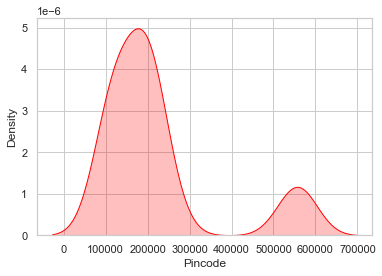

In [215]:
# Distribution plot for the column Pincode
sns.set(style="whitegrid")
sns.distplot(df["Pincode"],color="red",kde_kws={"shade": True},hist=False)
plt.show()

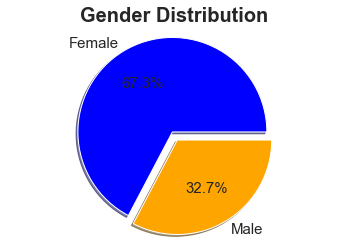

In [165]:
x=df['Gender'].value_counts()
explode=(0,0.1)
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%',explode=explode,colors=['blue', 'orange'],textprops={'fontsize':15})
plt.title("Gender Distribution",fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

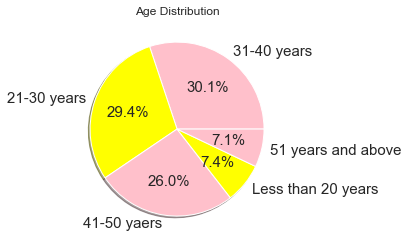

In [166]:
x=df['Age'].value_counts()
explode=(0,0.1)
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%',colors=['pink', 'yellow'],textprops={'fontsize':15})
plt.title("Age Distribution")
plt.show()

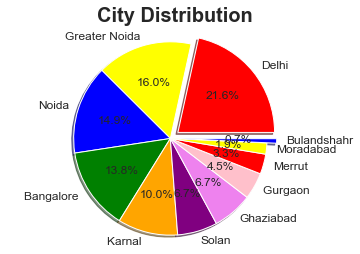

In [167]:
x=df['Shopping_City'].value_counts()
explode=(0.1,0,0,0,0,0,0,0,0,0,0.1)
ax=plt.subplot()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%',explode=explode,colors=['red','yellow','blue','green','orange','purple','violet','pink'],textprops={'fontsize':12})
plt.title("City Distribution",fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

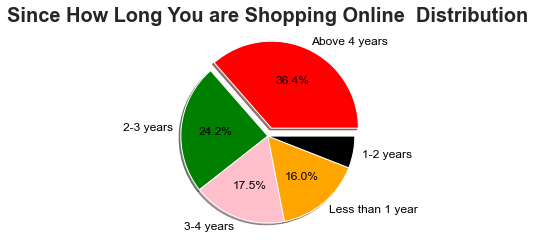

In [168]:
x=df['Shopping_Since'].value_counts()
explode=(0.1,0,0,0,0)
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%',explode=explode,colors=['red','green','pink','orange','black'],textprops={'fontsize':12,'color':'black'})
plt.title("Since How Long You are Shopping Online  Distribution",fontdict={'fontweight':'bold','fontsize':20})
plt.show()

Text(0, 0.5, 'Count')

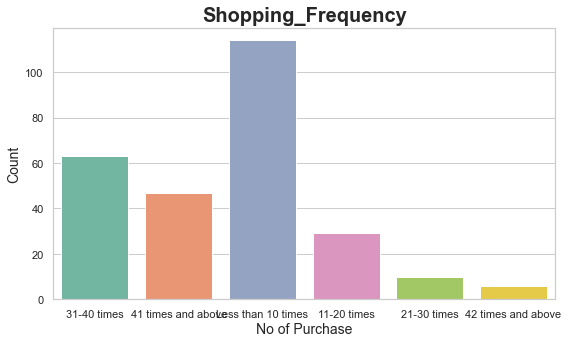

In [169]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(df['Shopping_Frequency'],palette='Set2')
plt.title('Shopping_Frequency',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('No of Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)

# PIE PLOTS

Pie plot for the column: Gender
Female    181
Male       88
Name: Gender, dtype: int64


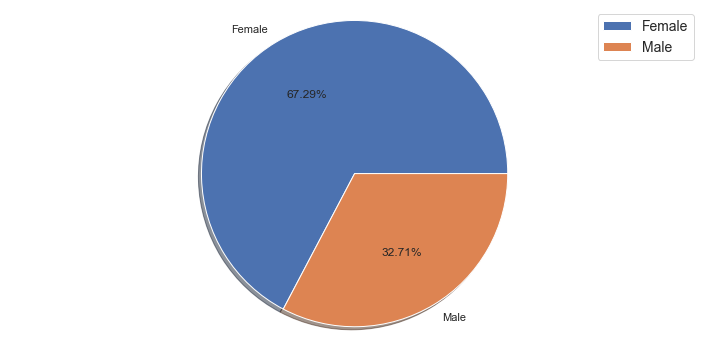

*****************************************************************************************************************************
Pie plot for the column: Age
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64


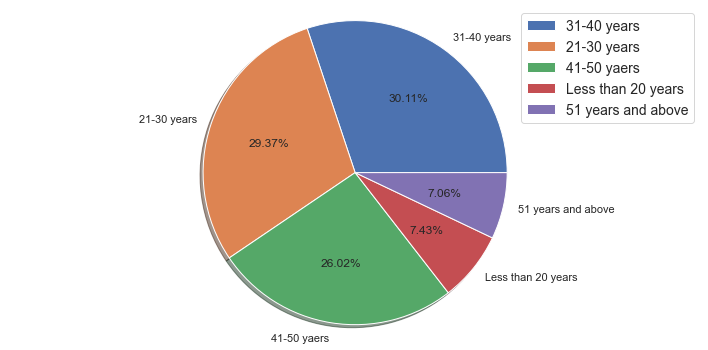

*****************************************************************************************************************************
Pie plot for the column: Internet_Accessibility
Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: Internet_Accessibility, dtype: int64


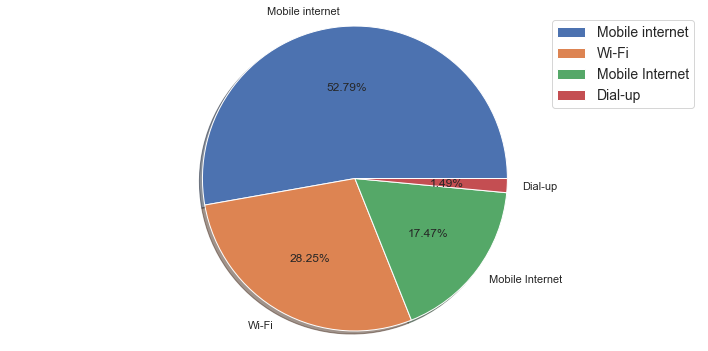

*****************************************************************************************************************************
Pie plot for the column: OS
Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64


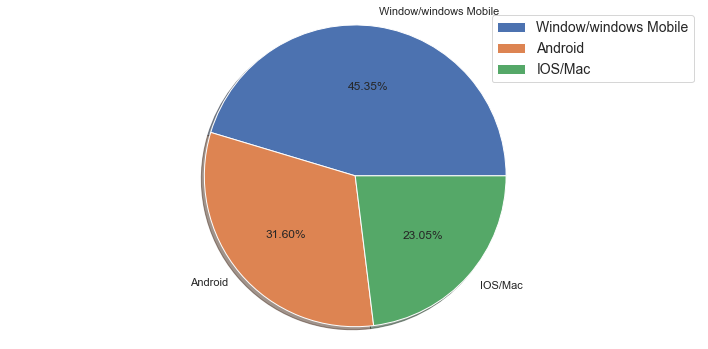

*****************************************************************************************************************************
Pie plot for the column: Channel_First_Used
Search Engine        230
Content Marketing     20
Display Adverts       19
Name: Channel_First_Used, dtype: int64


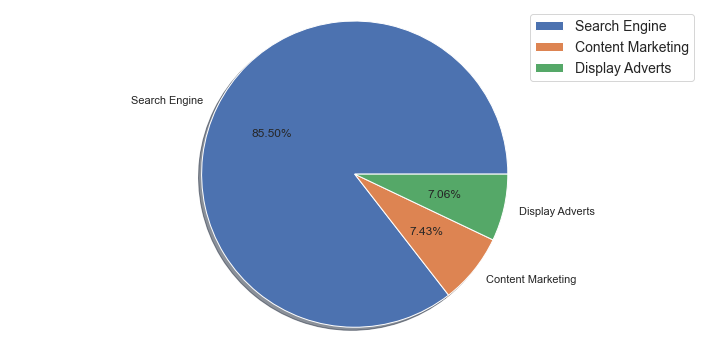

*****************************************************************************************************************************
Pie plot for the column: Payment_Mode
Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: Payment_Mode, dtype: int64


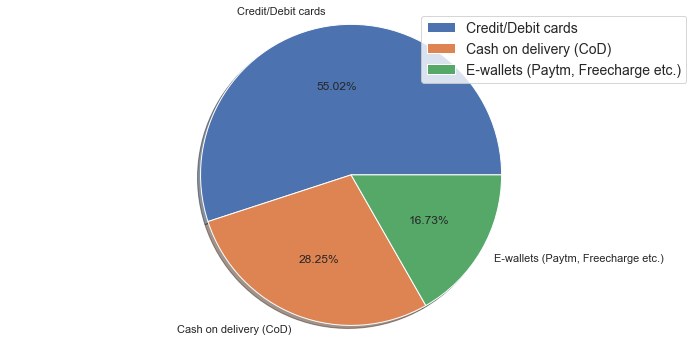

*****************************************************************************************************************************
Pie plot for the column: Convenient_Payment_Mode
Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: Convenient_Payment_Mode, dtype: int64


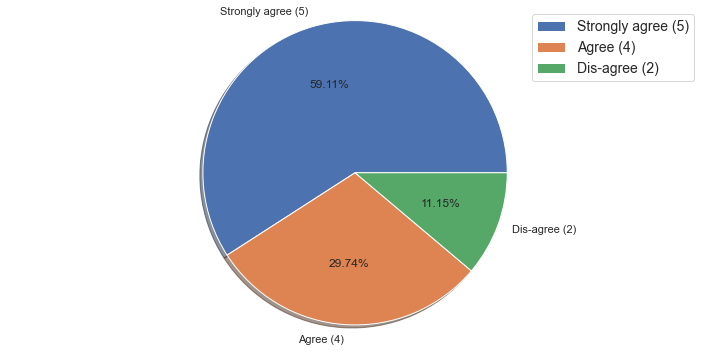

*****************************************************************************************************************************
Pie plot for the column: Customer_Privacy_Guarantee
Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: Customer_Privacy_Guarantee, dtype: int64


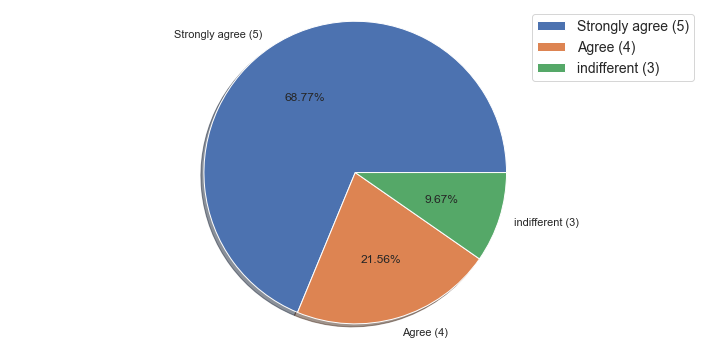

*****************************************************************************************************************************
Pie plot for the column: Benefits
Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: Benefits, dtype: int64


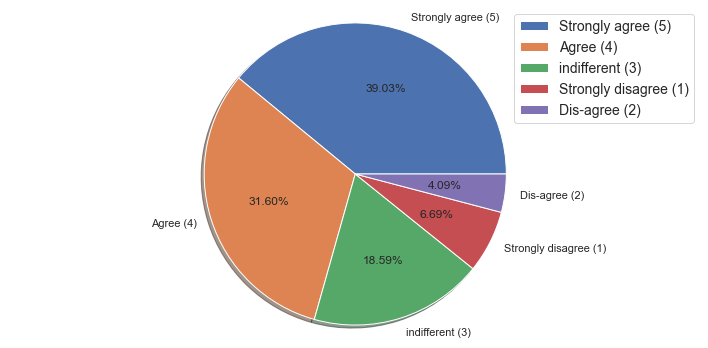

*****************************************************************************************************************************
Pie plot for the column: Enjoy
Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: Enjoy, dtype: int64


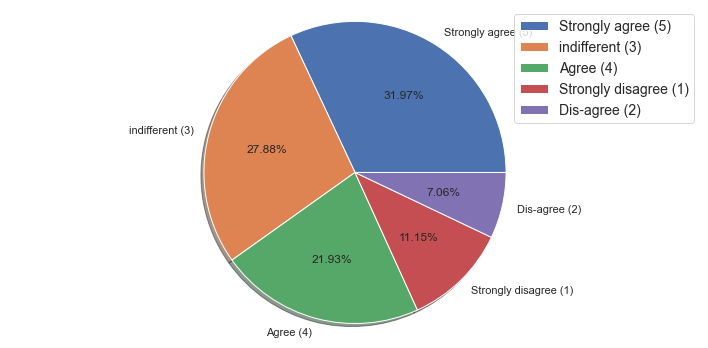

*****************************************************************************************************************************
Pie plot for the column: Return_Replacement_Policy
Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: Return_Replacement_Policy, dtype: int64


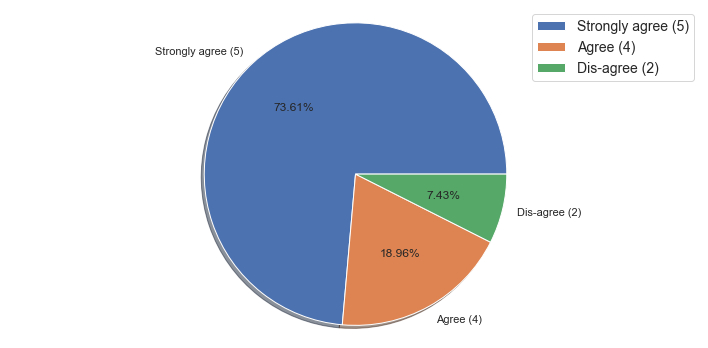

*****************************************************************************************************************************
Pie plot for the column: Loyalty_Programs_Access
Strongly agree (5)       115
Agree (4)                 64
indifferent (3)           64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: Loyalty_Programs_Access, dtype: int64


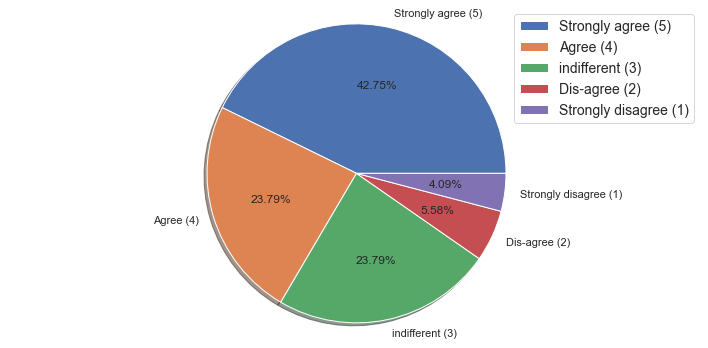

*****************************************************************************************************************************
Pie plot for the column: Info_Satisfaction
Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: Info_Satisfaction, dtype: int64


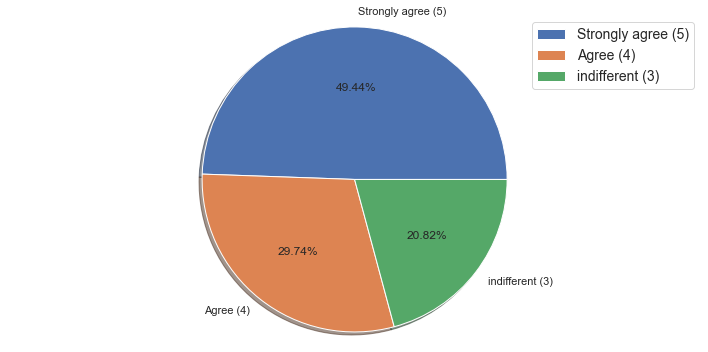

*****************************************************************************************************************************
Pie plot for the column: Site_Quality_Satisfaction
Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: Site_Quality_Satisfaction, dtype: int64


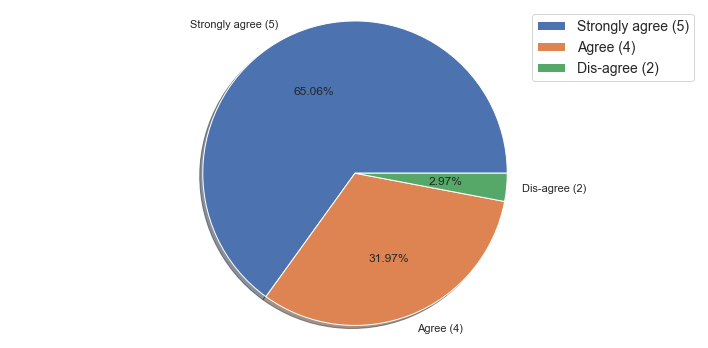

*****************************************************************************************************************************
Pie plot for the column: Net_Benefit_Satisfaction
Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: Net_Benefit_Satisfaction, dtype: int64


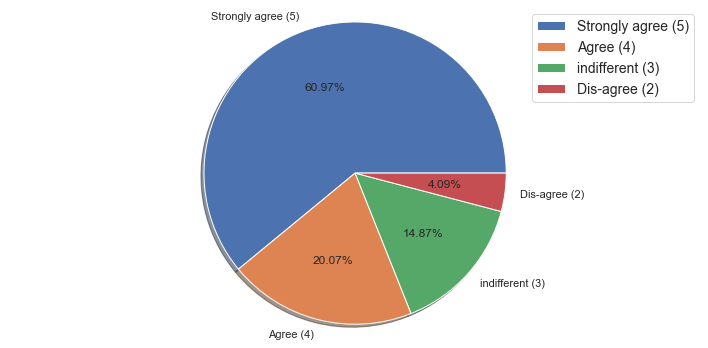

*****************************************************************************************************************************
Pie plot for the column: Trust
Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: Trust, dtype: int64


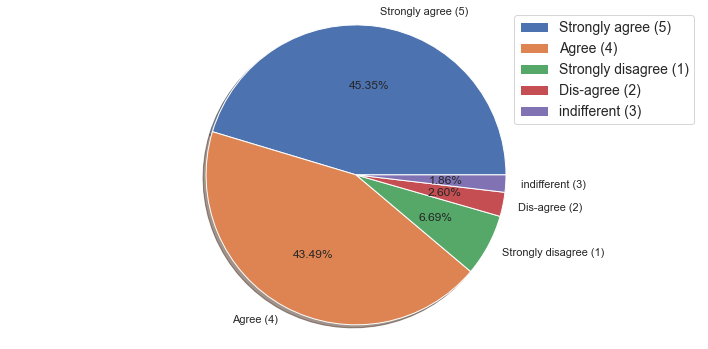

*****************************************************************************************************************************
Pie plot for the column: Monetary_Savings
Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: Monetary_Savings, dtype: int64


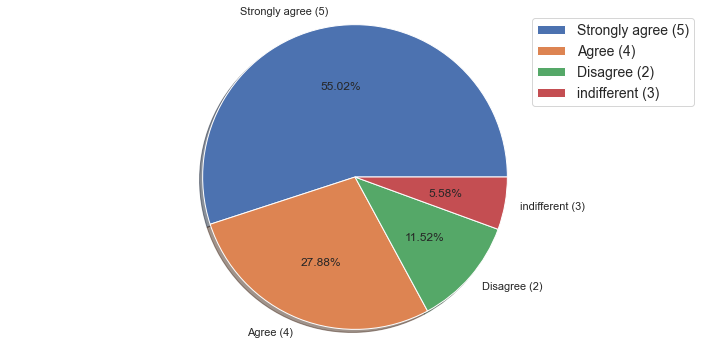

*****************************************************************************************************************************
Pie plot for the column: Patronizing_Convenience
Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: Patronizing_Convenience, dtype: int64


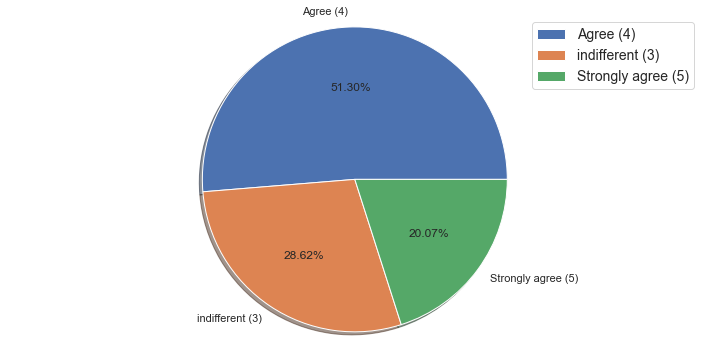

*****************************************************************************************************************************
Pie plot for the column: Adventure_Sense
Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: Adventure_Sense, dtype: int64


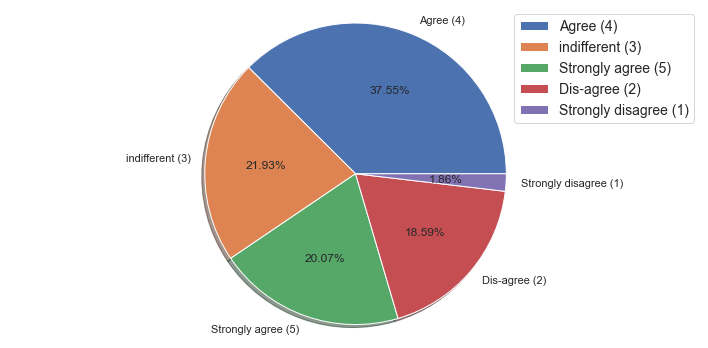

*****************************************************************************************************************************
Pie plot for the column: Social_Status
indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: Social_Status, dtype: int64


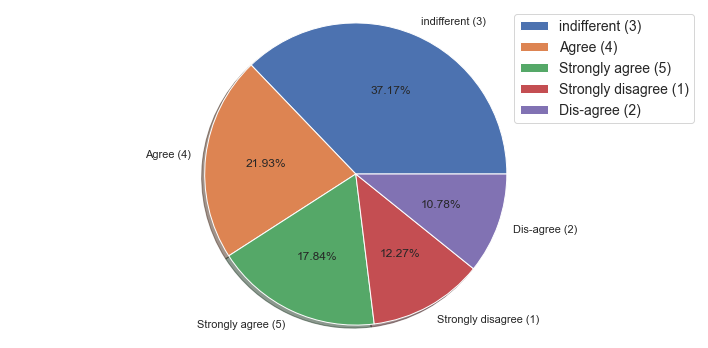

*****************************************************************************************************************************
Pie plot for the column: Gratification
indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: Gratification, dtype: int64


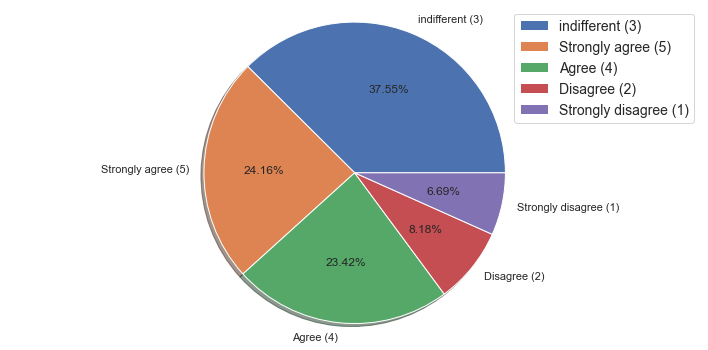

*****************************************************************************************************************************
Pie plot for the column: Money_Worthy
Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: Money_Worthy, dtype: int64


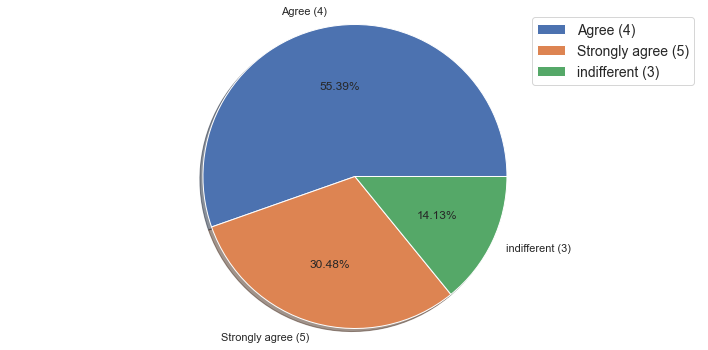

*****************************************************************************************************************************


In [170]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

col1 = ['Gender', 'Age', 'Internet_Accessibility','OS','Channel_First_Used', 'Payment_Mode','Convenient_Payment_Mode','Customer_Privacy_Guarantee','Benefits','Enjoy','Return_Replacement_Policy','Loyalty_Programs_Access','Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Monetary_Savings','Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Money_Worthy']

plotnumber=1
for j in df[col1]:
    print(f"Pie plot for the column:", j)
    print(df[j].value_counts())
    generate_pie(df[j])
    print("*"*125)

# COUNT PLOTS

In [171]:
def value_count(column):
    counts=len(df[column].value_counts())
    if counts<5:
        plt.figure(figsize=(5,5))
    elif counts<10:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    elif counts<20:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=df,palette="hsv")
    plt.show()
    print("*"*125)

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Shopping_City, dtype: int64


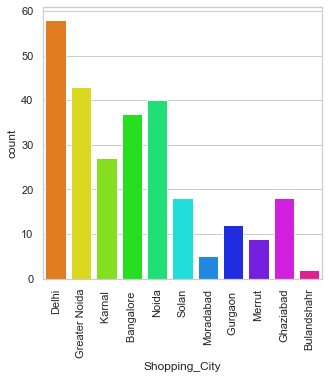

*****************************************************************************************************************************
Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Shopping_Since, dtype: int64


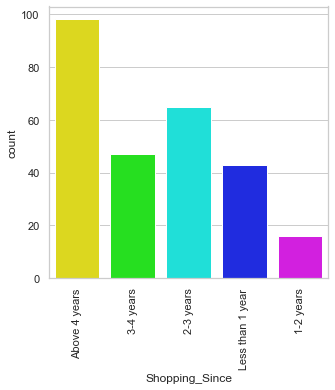

*****************************************************************************************************************************
Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: Shopping_Frequency, dtype: int64


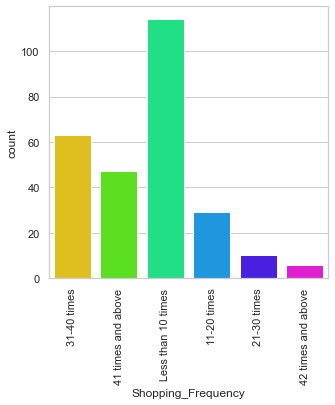

*****************************************************************************************************************************
Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: Device_Used, dtype: int64


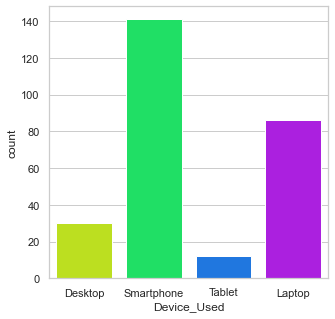

*****************************************************************************************************************************
Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: Screen_Size, dtype: int64


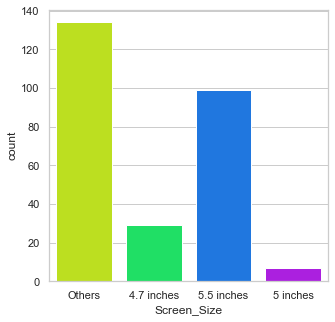

*****************************************************************************************************************************
Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: Browser_Used, dtype: int64


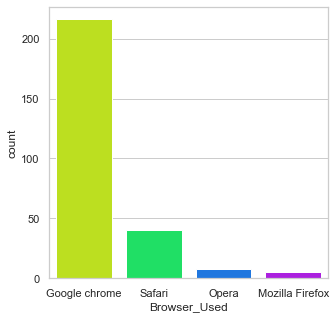

*****************************************************************************************************************************
Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: Login_Mode, dtype: int64


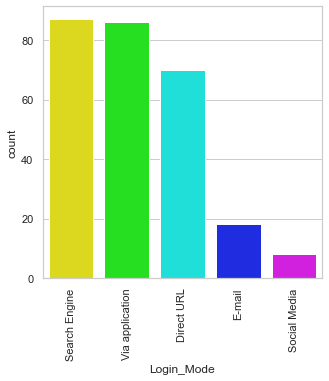

*****************************************************************************************************************************
more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: Time_Explored, dtype: int64


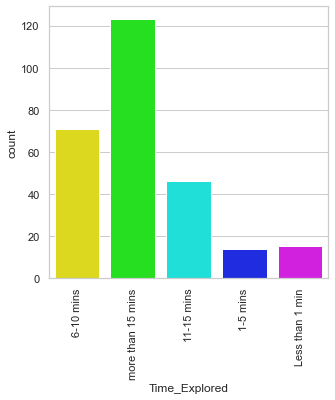

*****************************************************************************************************************************
Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: Abandon_Frequency, dtype: int64


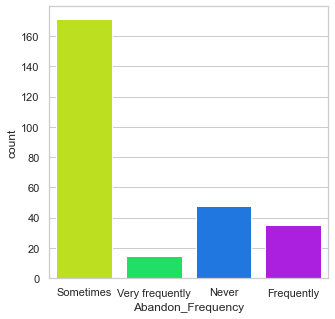

*****************************************************************************************************************************
Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Abandon_Reason, dtype: int64


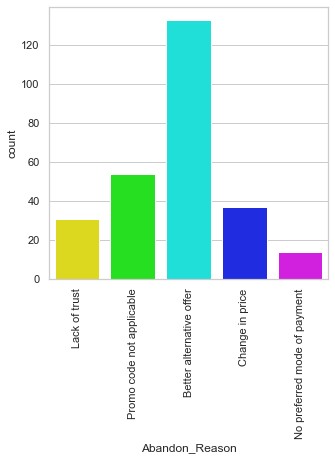

*****************************************************************************************************************************
Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: Content_Readability, dtype: int64


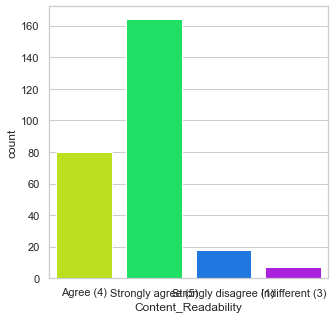

*****************************************************************************************************************************
Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: Similar_Product_Info, dtype: int64


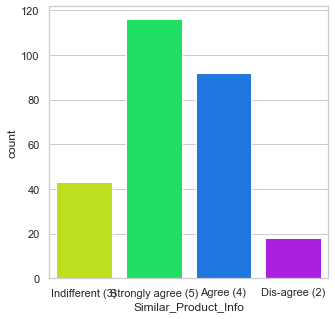

*****************************************************************************************************************************
Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: Seller_Product_Info, dtype: int64


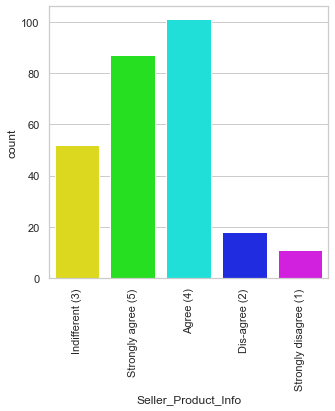

*****************************************************************************************************************************
Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: Product_Info_Clarity, dtype: int64


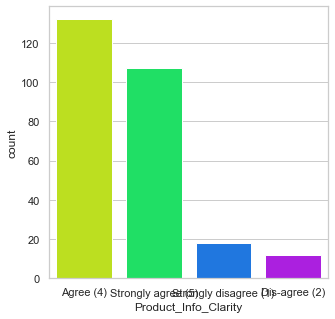

*****************************************************************************************************************************
Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: Navigation_Ease, dtype: int64


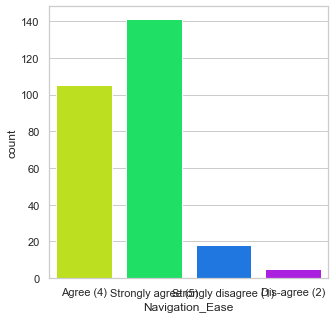

*****************************************************************************************************************************
Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Strongly disagree (1)     12
Indifferent (3)           12
Name: Loading_Processing_Speed, dtype: int64


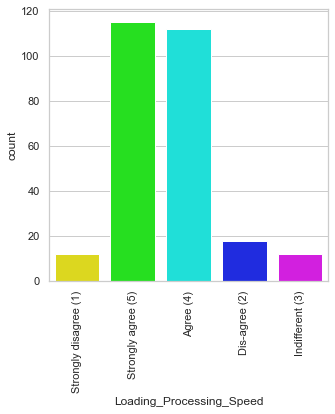

*****************************************************************************************************************************
Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: User_Friendly_Interface, dtype: int64


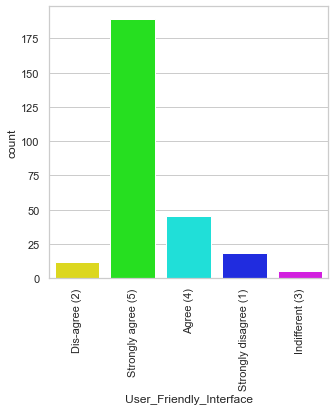

*****************************************************************************************************************************
Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: Timely_Fulfilment_Trust, dtype: int64


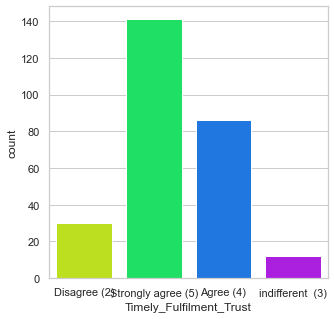

*****************************************************************************************************************************
Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: Customer_Support_Response, dtype: int64


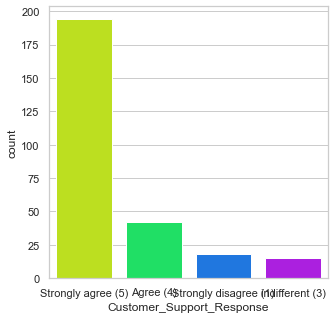

*****************************************************************************************************************************
Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: Various_Channel_Responses, dtype: int64


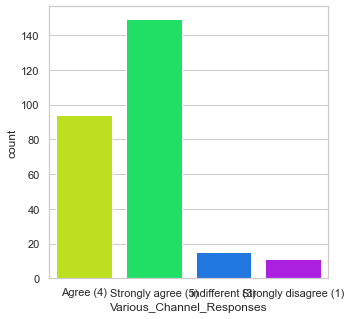

*****************************************************************************************************************************
Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: Convenience, dtype: int64


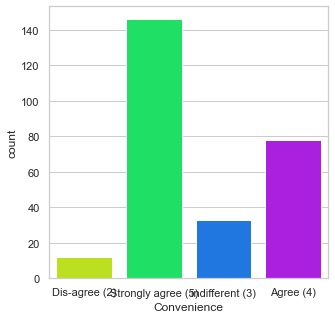

*****************************************************************************************************************************
Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: Product_Several_Category, dtype: int64


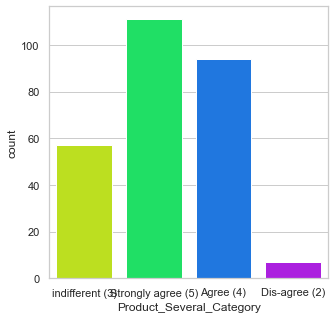

*****************************************************************************************************************************
Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: Relevant_Product_Info, dtype: int64


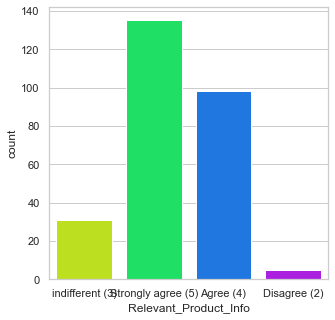

*****************************************************************************************************************************
Agree (4)                88
indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: Role_Fulfilment, dtype: int64


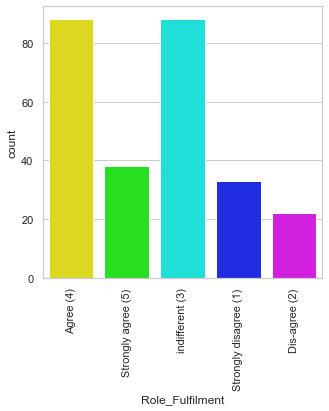

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: Shopped_From, dtype: int64


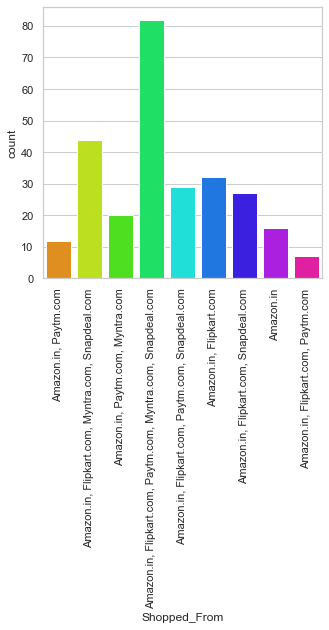

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy_Web_App, dtype: int64


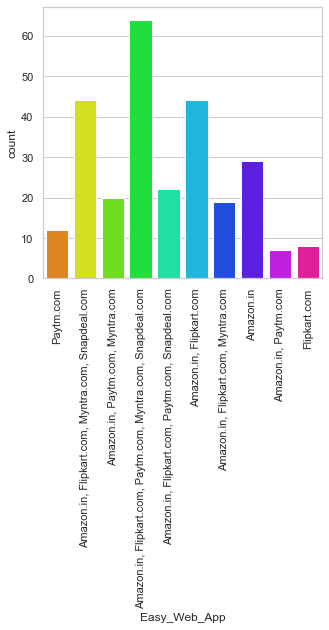

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visually_Appealing_WebApp, dtype: int64


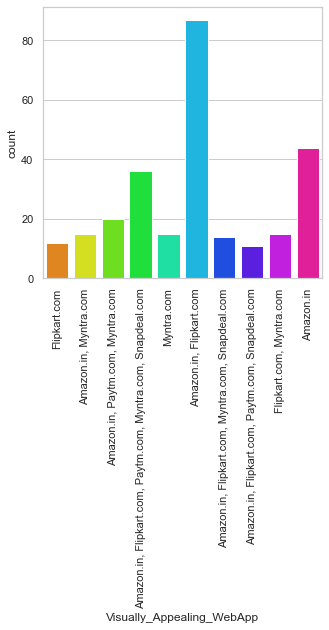

*****************************************************************************************************************************
Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Product_Variety, dtype: int64


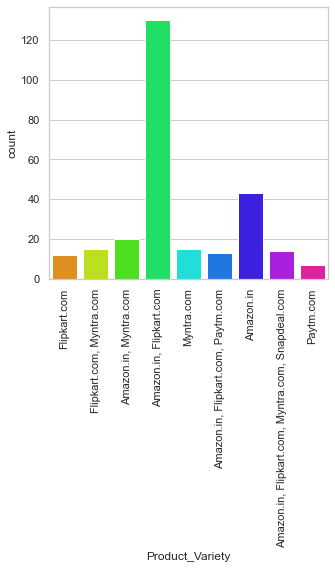

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete_Product_Info, dtype: int64


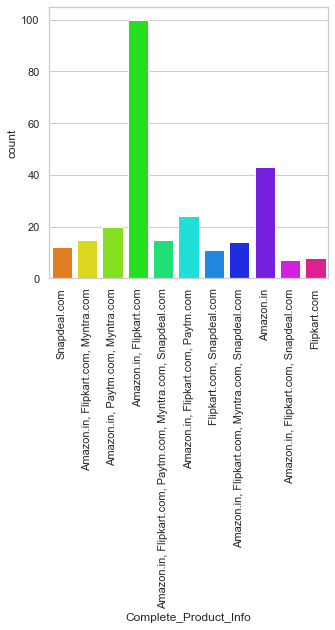

*****************************************************************************************************************************
Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast_WebApp, dtype: int64


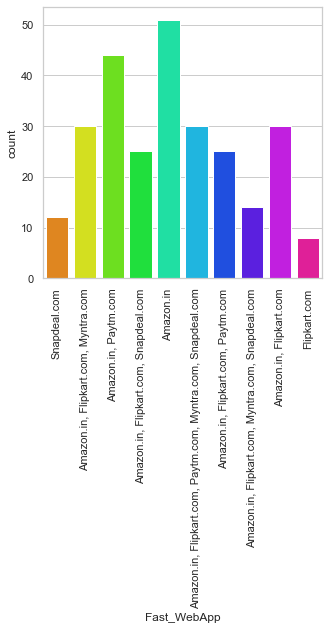

*****************************************************************************************************************************
Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliable_WebApp, dtype: int64


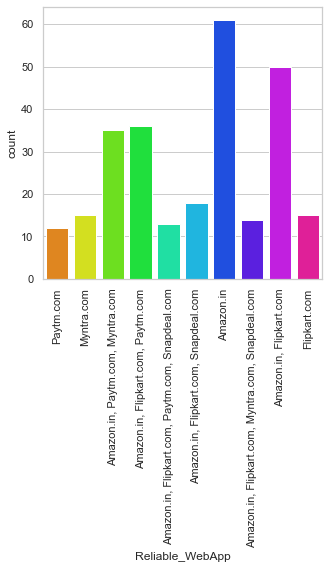

*****************************************************************************************************************************
Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quick_Purchase, dtype: int64


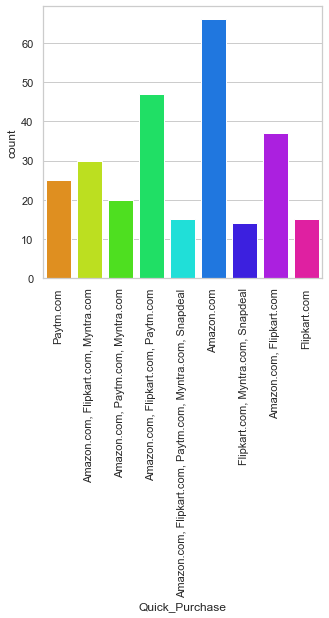

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Payment_Options_Availability, dtype: int64


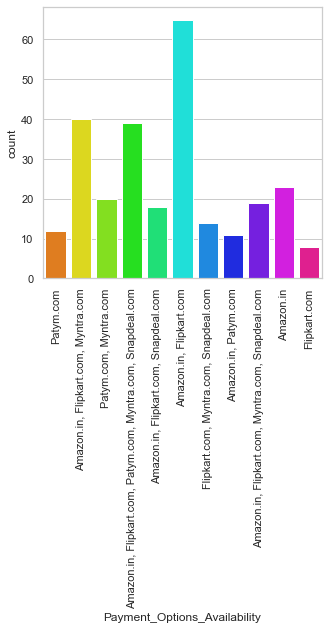

*****************************************************************************************************************************
Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Fast_Delivery, dtype: int64


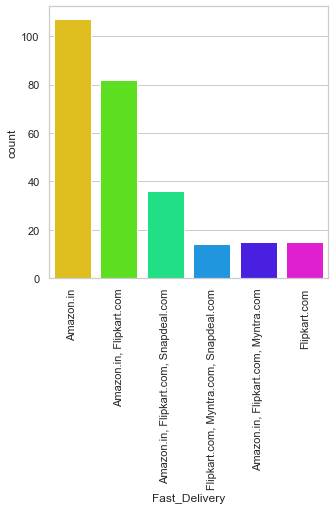

*****************************************************************************************************************************
Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Customer_Privacy_Info, dtype: int64


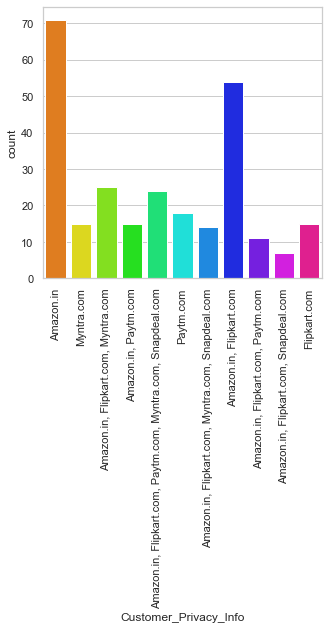

*****************************************************************************************************************************
Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Financial_Security_Info, dtype: int64


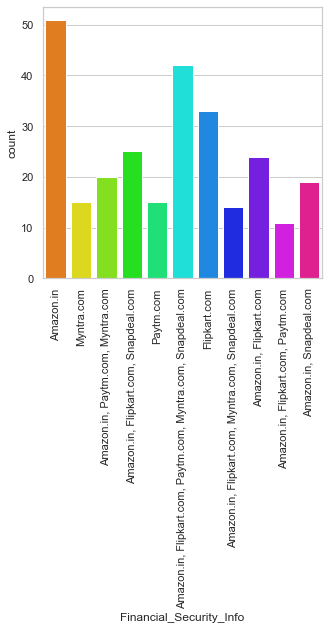

*****************************************************************************************************************************
Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived_Trustworthiness, dtype: int64


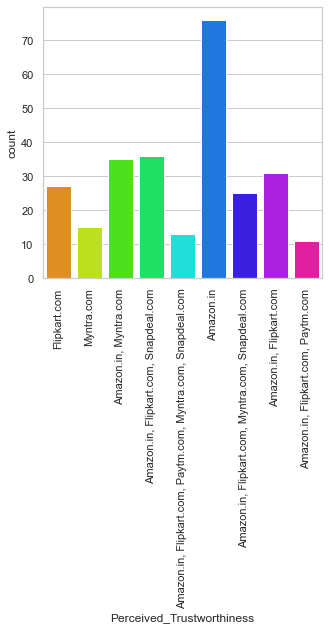

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Multichannel_Assistance, dtype: int64


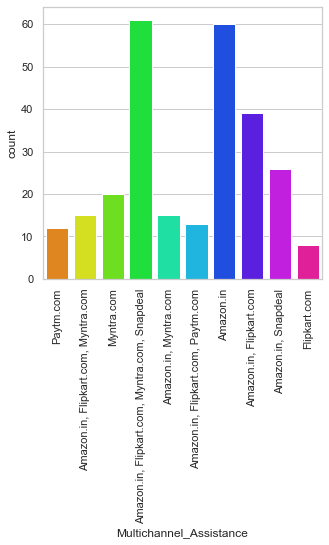

*****************************************************************************************************************************
Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Long_Login_Time, dtype: int64


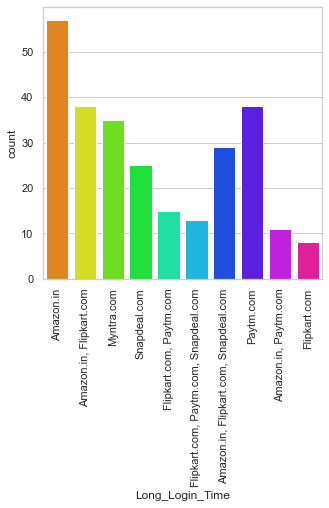

*****************************************************************************************************************************
Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Long_Display_Time, dtype: int64


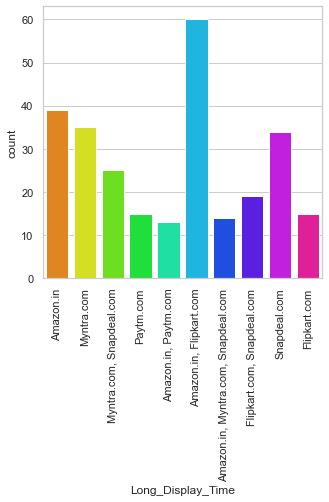

*****************************************************************************************************************************
Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late_Price_Declare, dtype: int64


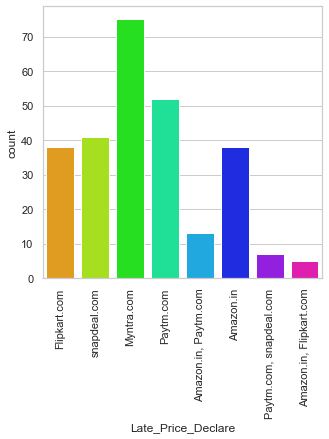

*****************************************************************************************************************************
Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Long_Loading_Time, dtype: int64


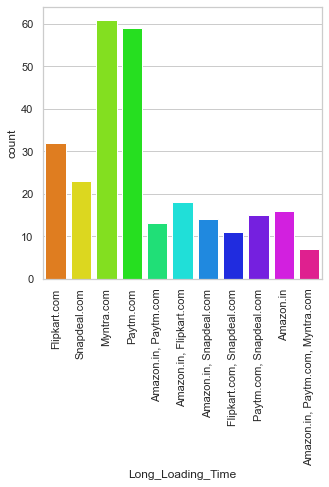

*****************************************************************************************************************************
Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited_Payment_Mode, dtype: int64


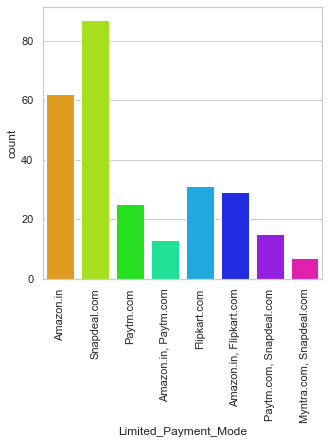

*****************************************************************************************************************************
Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Late_Delivery, dtype: int64


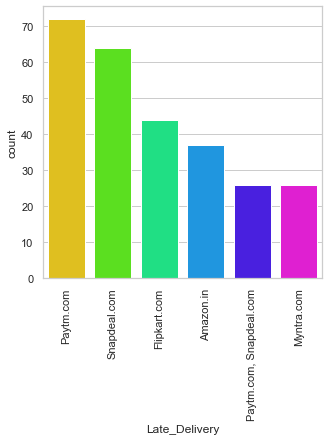

*****************************************************************************************************************************
Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: WebApp_Design_Change, dtype: int64


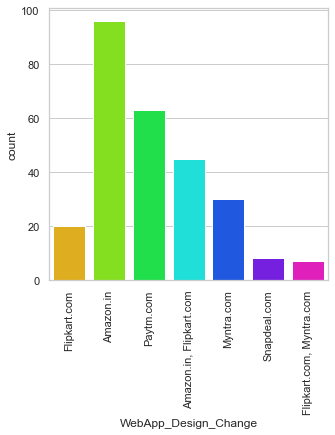

*****************************************************************************************************************************
Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Page_Disruption, dtype: int64


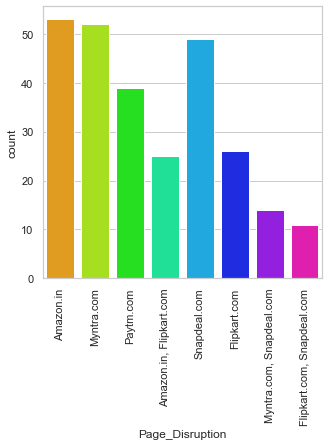

*****************************************************************************************************************************
Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: WebApp_Efficiency, dtype: int64


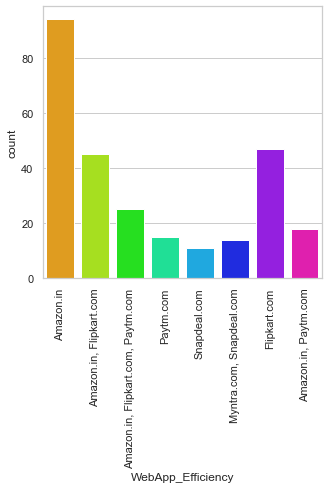

*****************************************************************************************************************************


In [172]:
df1=df.iloc[:,[2,4,5,7,8,10,12,13,15,16,17,18,19,20,21,22,23,25,26,28,31,38,39,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69]]
for i in df1:
    print(df1[i].value_counts())
    value_count(i)

# Bivariate Analysis

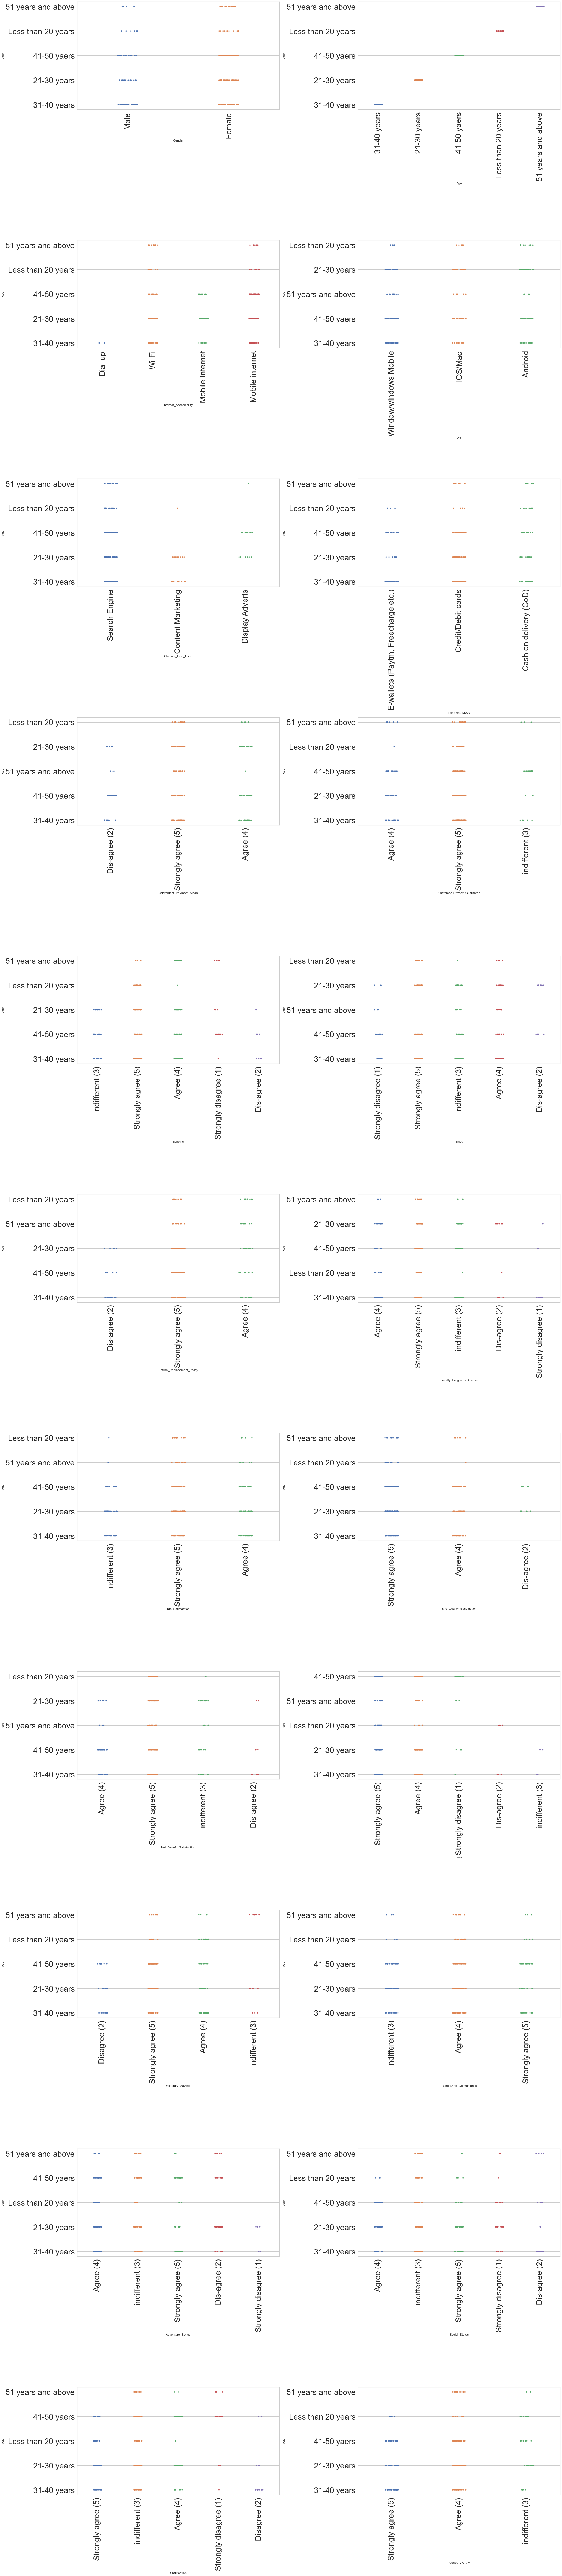

In [174]:
#Checking the relationship of Age with all the other features using stripplot
plt.figure(figsize=(30,500))
for i in range(len(col1)):
    plt.subplot(40,2,i+1)
    sns.stripplot(y='Age',x=df[col1[i]],data=df)
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(fontsize=30)
    plt.tight_layout()

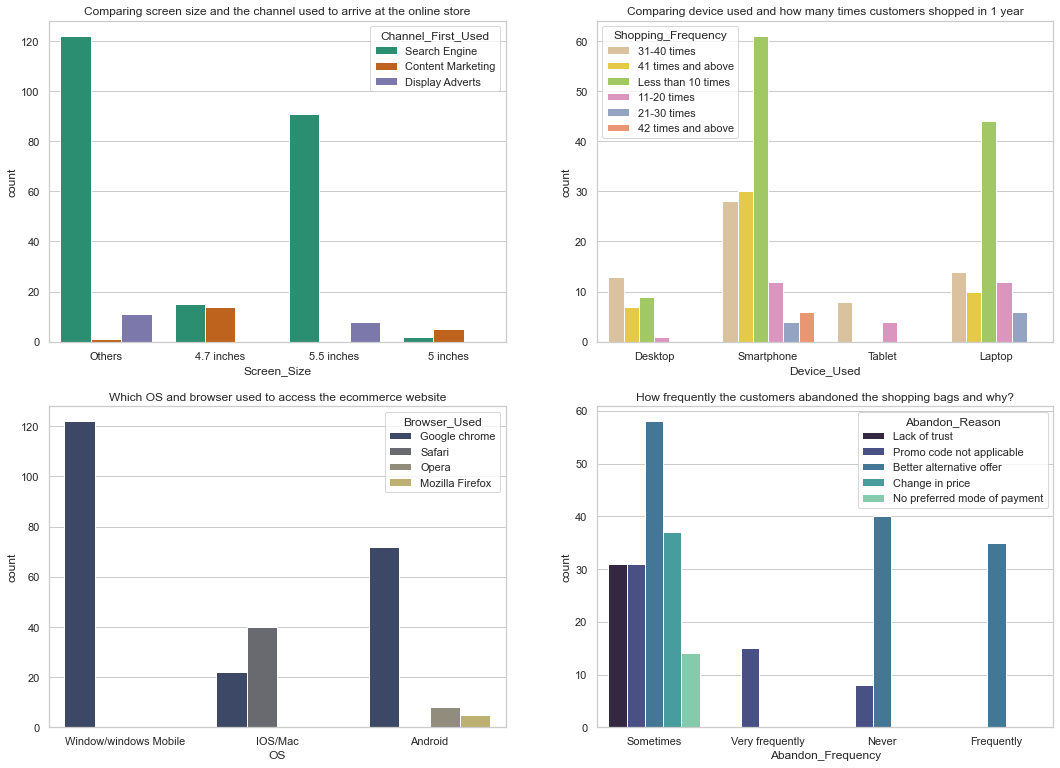

In [180]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparing screen size and the channel used to arrive at the online store',fontsize=12)
sns.countplot(df['Screen_Size'],hue=df['Channel_First_Used'],palette="Dark2");

plt.subplot(2,2,2)
plt.title('Comparing device used and how many times customers shopped in 1 year',fontsize=12)
sns.countplot(df['Device_Used'],hue=df['Shopping_Frequency'],palette="Set2_r");

plt.subplot(2,2,3)
plt.title('Which OS and browser used to access the ecommerce website',fontsize=12)
sns.countplot(df['OS'],hue=df['Browser_Used'],palette="cividis");

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags and why?',fontsize=12)
sns.countplot(df['Abandon_Frequency'],hue=df['Abandon_Reason'],palette="mako");

plt.subplot(2,2,2).legend(loc ="upper left",title="Shopping_Frequency");
plt.subplot(2,2,4).legend(loc ="upper right",title="Abandon_Reason");
plt.show()

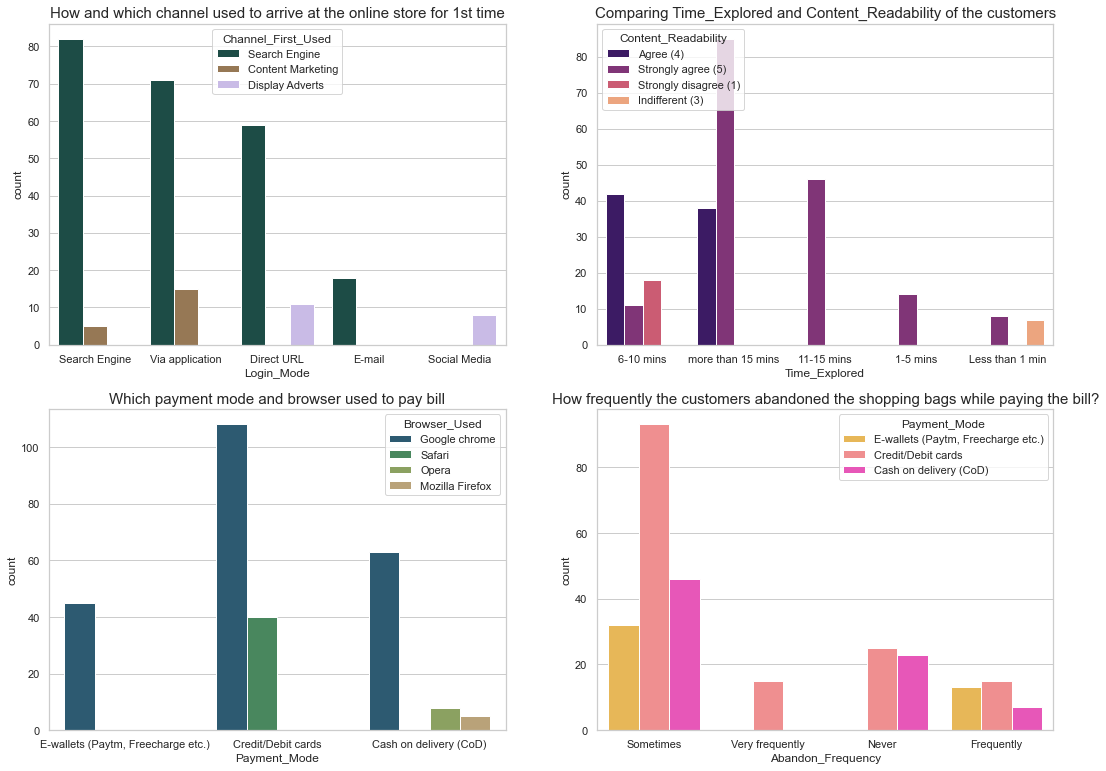

In [181]:
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('How and which channel used to arrive at the online store for 1st time',fontsize=15)
sns.countplot('Login_Mode',hue='Channel_First_Used',palette="cubehelix",data=df);

plt.subplot(2,2,2)
plt.title('Comparing Time_Explored and Content_Readability of the customers',fontsize=15)
sns.countplot('Time_Explored',hue='Content_Readability',palette="magma",data=df);

plt.subplot(2,2,3)
plt.title('Which payment mode and browser used to pay bill',fontsize=15)
sns.countplot('Payment_Mode',hue='Browser_Used',palette="gist_earth",data=df);

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags while paying the bill?',fontsize=15)
sns.countplot('Abandon_Frequency',hue='Payment_Mode',palette="spring_r",data=df);

plt.show()

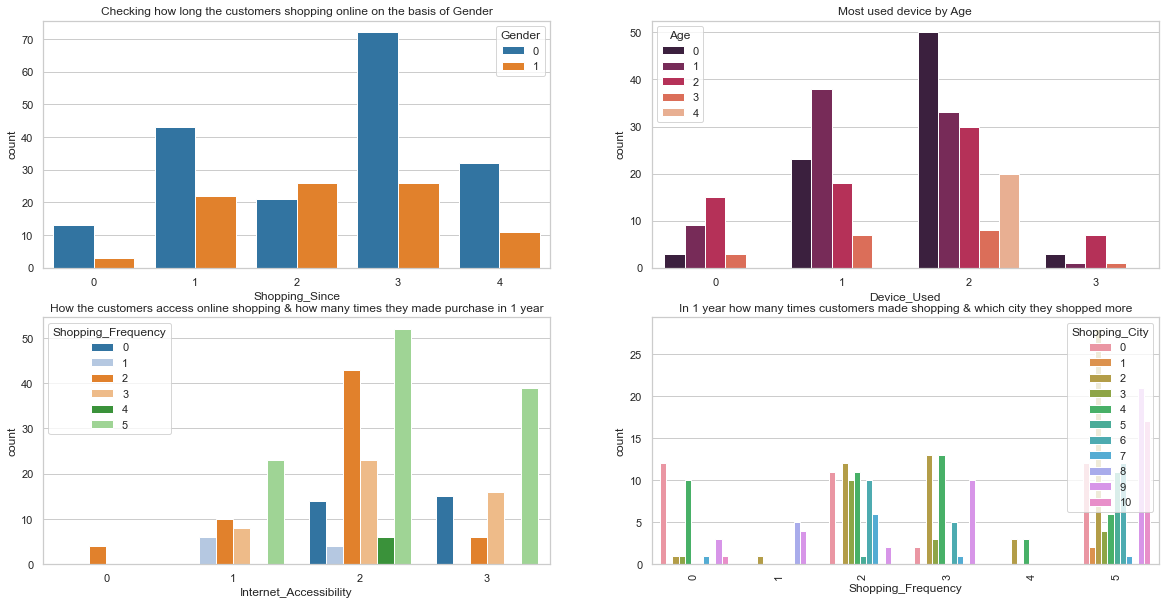

In [216]:
# Comparision between two variables
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
plt.title('Checking how long the customers shopping online on the basis of Gender')
sns.countplot(df['Shopping_Since'],hue=df['Gender'],palette="tab10");

plt.subplot(2,2,2)
plt.title('Most used device by Age')
sns.countplot(df['Device_Used'],hue=df['Age'],palette="rocket");

plt.subplot(2,2,3)
plt.title('How the customers access online shopping & how many times they made purchase in 1 year')
sns.countplot(df['Internet_Accessibility'],hue=df['Shopping_Frequency'],palette="tab20");

plt.subplot(2,2,4)
plt.title('In 1 year how many times customers made shopping & which city they shopped more')
sns.countplot(df['Shopping_Frequency'],hue=df['Shopping_City']);

plt.xticks(rotation=90)
plt.subplot(2,2,3).legend(loc ="upper left",title="Shopping_Frequency");
plt.subplot(2,2,4).legend(loc ="upper right",title="Shopping_City");
plt.show()

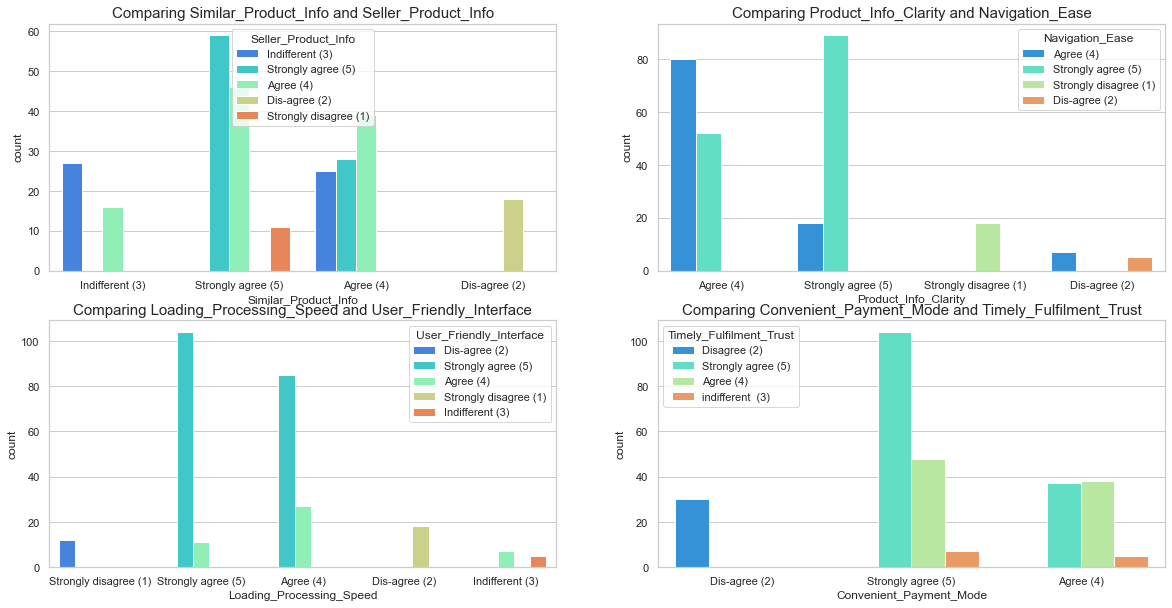

In [184]:
# Comparision between two variables
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
plt.title('Comparing Similar_Product_Info and Seller_Product_Info',fontsize=15)
sns.countplot(df['Similar_Product_Info'],hue=df['Seller_Product_Info'],palette="rainbow");

plt.subplot(2,2,2)
plt.title('Comparing Product_Info_Clarity and Navigation_Ease',fontsize=15)
sns.countplot(df['Product_Info_Clarity'],hue=df['Navigation_Ease'],palette="rainbow");

plt.subplot(2,2,3)
plt.title('Comparing Loading_Processing_Speed and User_Friendly_Interface',fontsize=15)
sns.countplot(df['Loading_Processing_Speed'],hue=df['User_Friendly_Interface'],palette="rainbow");

plt.subplot(2,2,4)
plt.title('Comparing Convenient_Payment_Mode and Timely_Fulfilment_Trust',fontsize=15)
sns.countplot(df['Convenient_Payment_Mode'],hue=df['Timely_Fulfilment_Trust'],palette="rainbow");

plt.subplot(2,2,4).legend(loc ="upper left",title="Timely_Fulfilment_Trust");
plt.show()

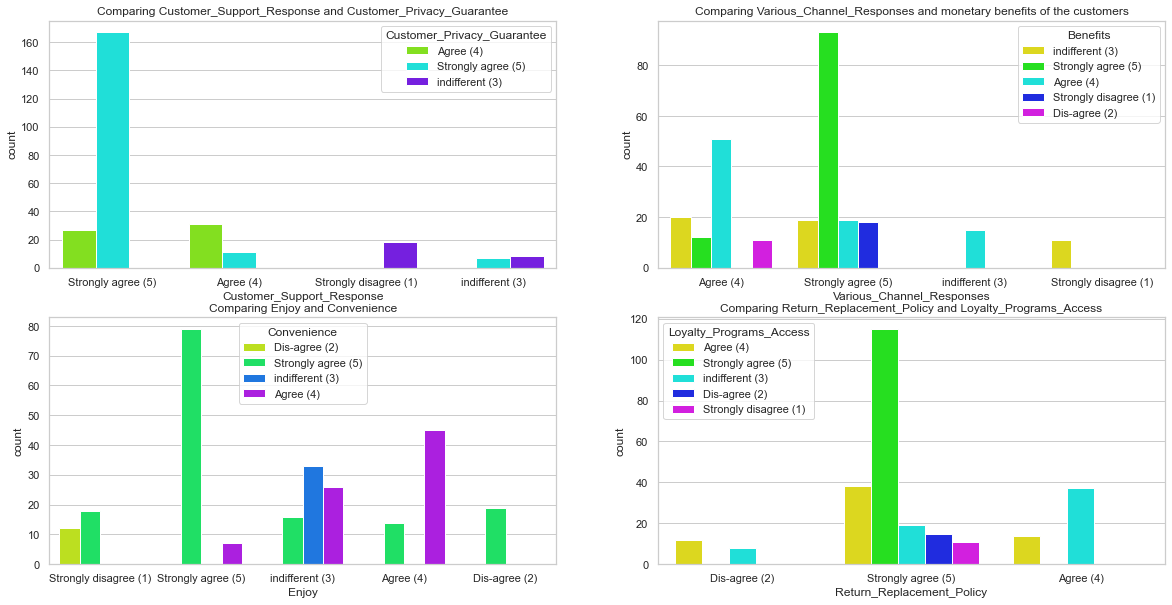

In [186]:
# Comparision between two variables
plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
plt.title('Comparing Customer_Support_Response and Customer_Privacy_Guarantee',fontsize=12)
sns.countplot(df['Customer_Support_Response'],hue=df['Customer_Privacy_Guarantee'],palette="hsv");

plt.subplot(2,2,2)
plt.title('Comparing Various_Channel_Responses and monetary benefits of the customers',fontsize=12)
sns.countplot(df['Various_Channel_Responses'],hue=df['Benefits'],palette="hsv");

plt.subplot(2,2,3)
plt.title('Comparing Enjoy and Convenience',fontsize=12)
sns.countplot(df['Enjoy'],hue=df['Convenience'],palette="hsv");

plt.subplot(2,2,4)
plt.title('Comparing Return_Replacement_Policy and Loyalty_Programs_Access',fontsize=12)
sns.countplot(df['Return_Replacement_Policy'],hue=df['Loyalty_Programs_Access'],palette="hsv");

plt.subplot(2,2,2).legend(loc ="upper right",title="Benefits");
plt.subplot(2,2,4).legend(loc ="upper left",title="Loyalty_Programs_Access");

plt.show()


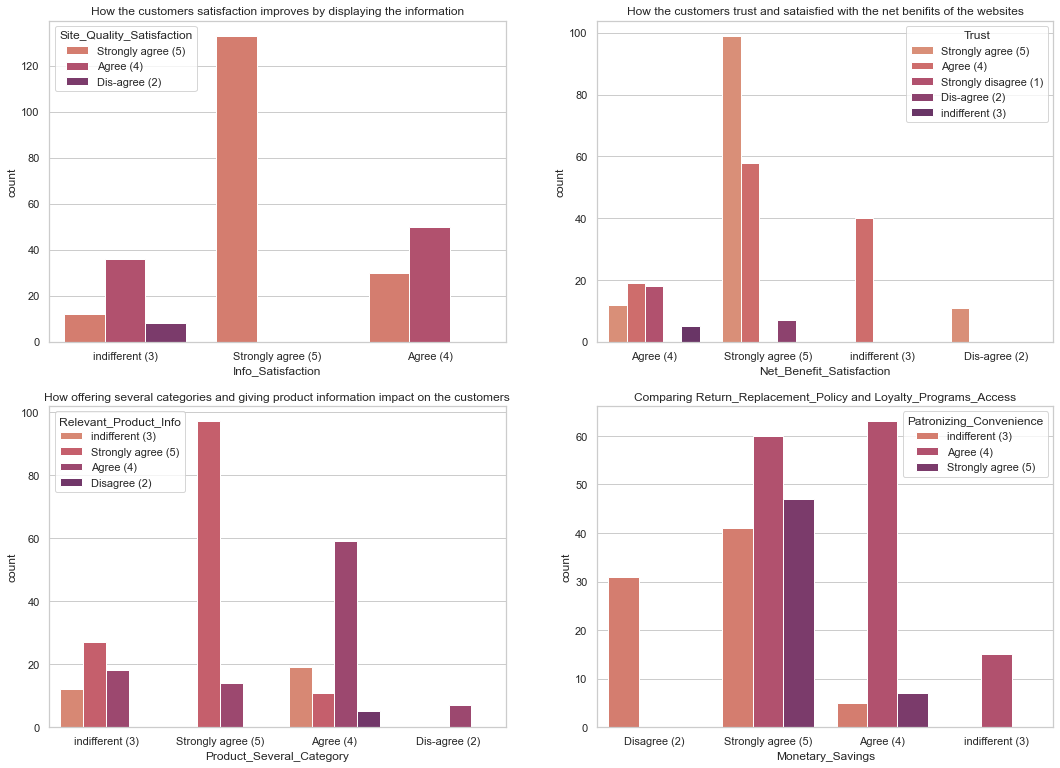

In [187]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('How the customers satisfaction improves by displaying the information',fontsize=12)
sns.countplot(df['Info_Satisfaction'],hue=df['Site_Quality_Satisfaction'],palette="flare");

plt.subplot(2,2,2)
plt.title('How the customers trust and sataisfied with the net benifits of the websites',fontsize=12)
sns.countplot(df['Net_Benefit_Satisfaction'],hue=df['Trust'],palette="flare");

plt.subplot(2,2,3)
plt.title('How offering several categories and giving product information impact on the customers',fontsize=12)
sns.countplot(df['Product_Several_Category'],hue=df['Relevant_Product_Info'],palette="flare");

plt.subplot(2,2,4)
plt.title('Comparing Return_Replacement_Policy and Loyalty_Programs_Access',fontsize=12)
sns.countplot(df['Monetary_Savings'],hue=df['Patronizing_Convenience'],palette="flare");

plt.subplot(2,2,2).legend(loc ="upper right",title="Trust");
plt.show()

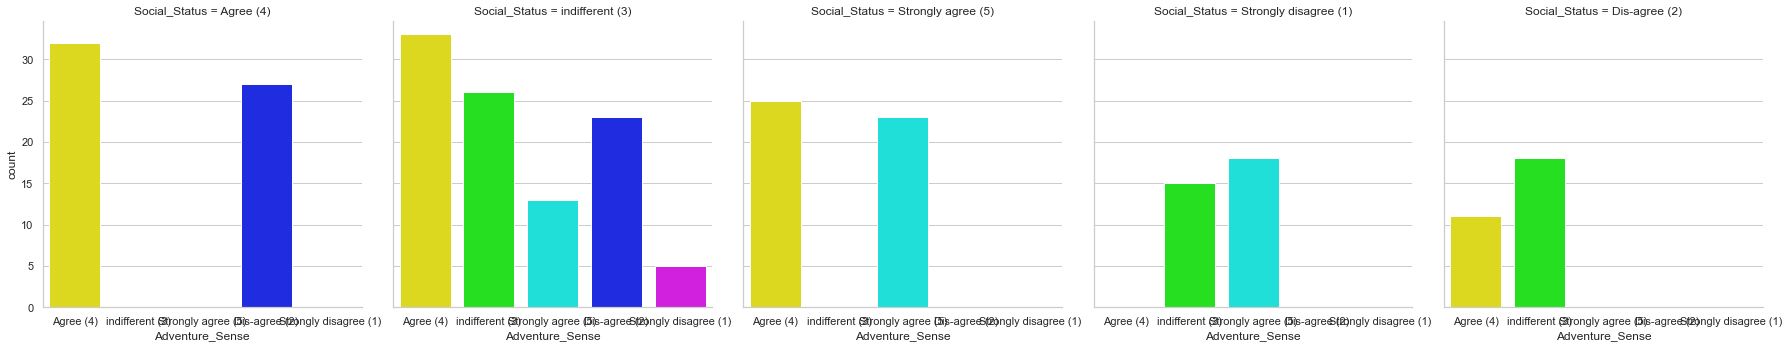

In [188]:
# Comparing how the shopping on e-tailer gives sense of adventure and enhances the social status of the customers
sns.factorplot(x='Adventure_Sense',col='Social_Status',data=df,palette="hsv",kind="count")
plt.show()

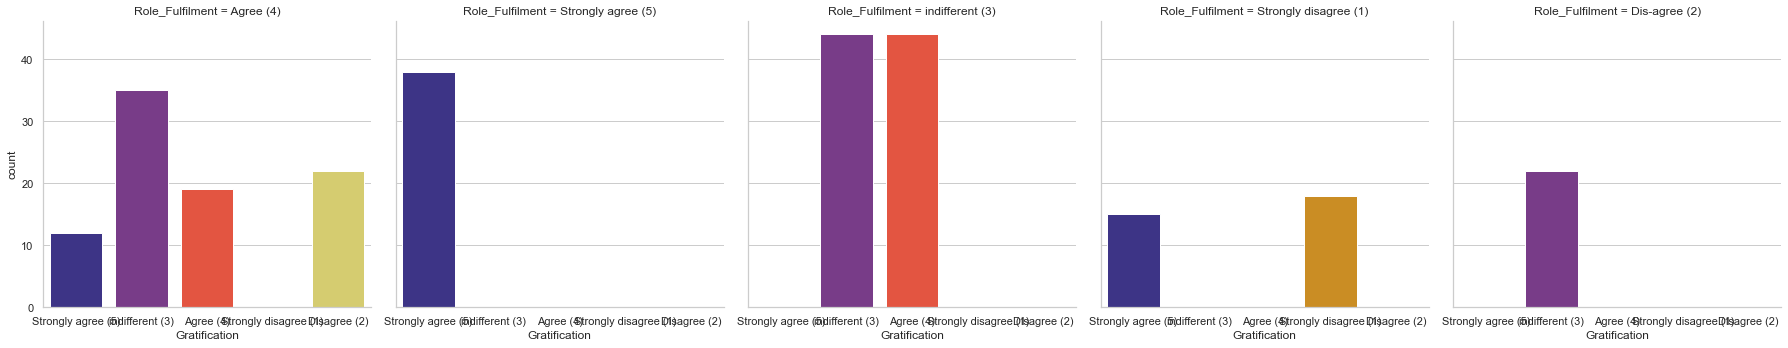

In [189]:
# Comparing how the shopping on favorite e-tailer makes customer feel gratification and helps them fulfill their certain role
sns.factorplot(x='Gratification',col='Role_Fulfilment',data=df,palette="CMRmap",kind="count")
plt.show()

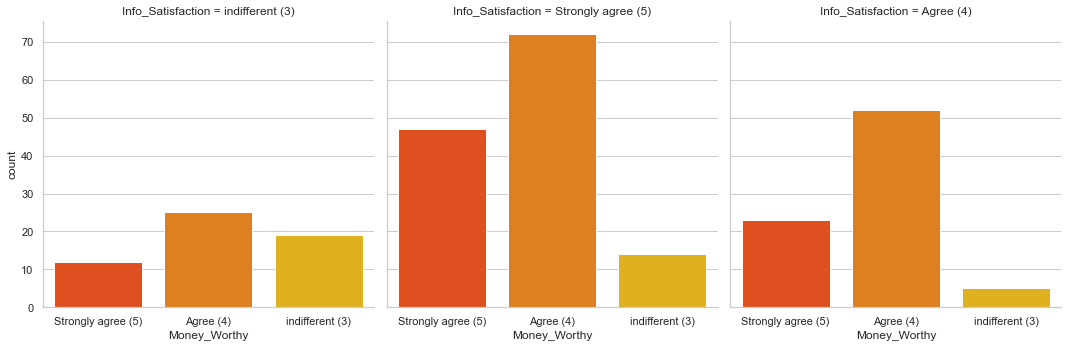

In [191]:
# Checking whether the customers getting value for money spent while shopping online after getting information about the product
sns.factorplot(x='Money_Worthy',col='Info_Satisfaction',data=df,palette="autumn",kind="count")
plt.show()


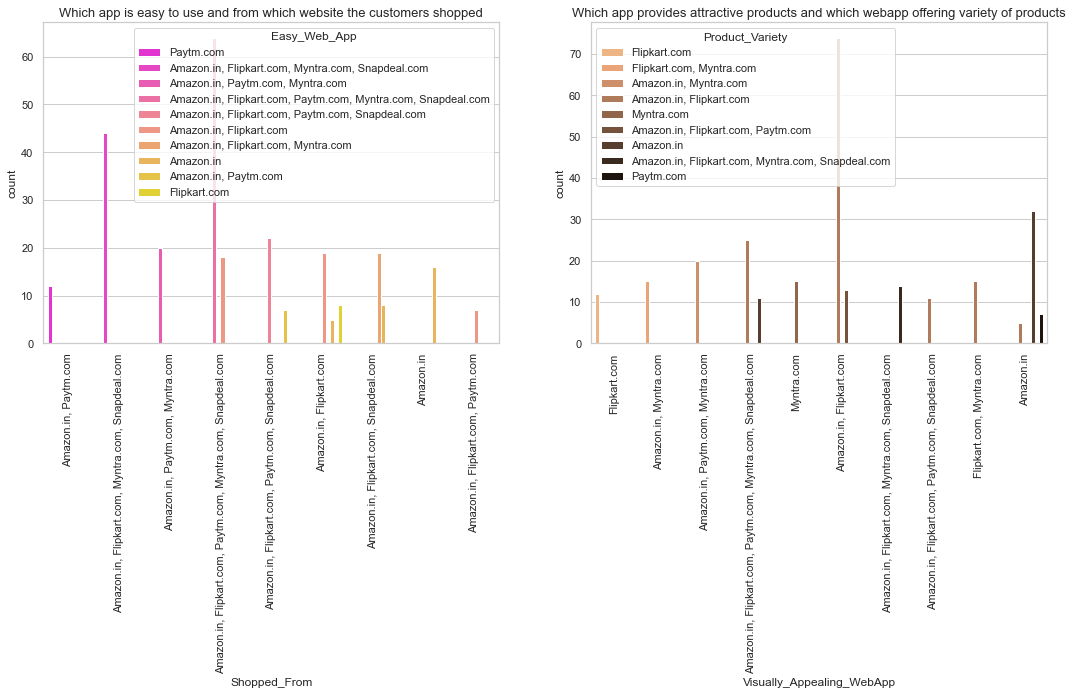

In [192]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Which app is easy to use and from which website the customers shopped',fontsize=13)
sns.countplot(x='Shopped_From',hue='Easy_Web_App',palette="spring",data=df);
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Which app provides attractive products and which webapp offering variety of products',fontsize=13)
sns.countplot(x='Visually_Appealing_WebApp',hue='Product_Variety',palette="copper_r",data=df);
plt.xticks(rotation=90)

plt.subplot(2,2,1).legend(loc='upper right',title="Easy_Web_App");
plt.subplot(2,2,2).legend(loc ="upper left",title="Product_Variety");
plt.show()

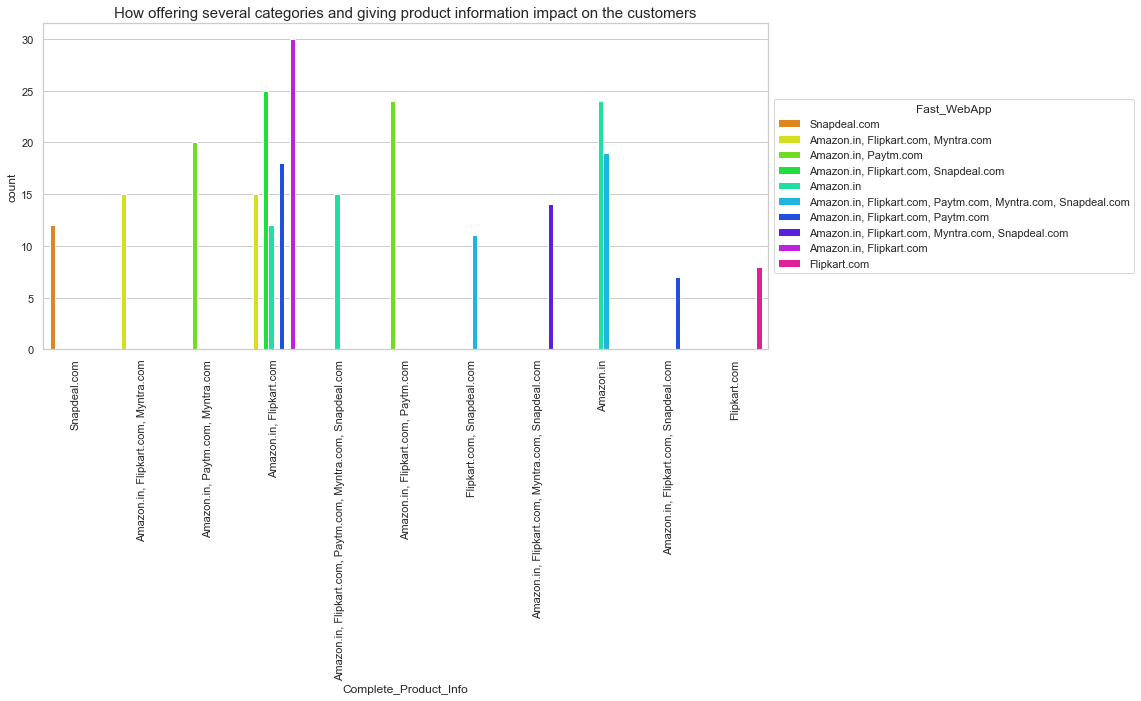

In [194]:
plt.figure(figsize=(13,6))
plt.title('How offering several categories and giving product information impact on the customers',fontsize=15)
sns.countplot(x='Complete_Product_Info',hue='Fast_WebApp',palette="hsv",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Fast_WebApp")
plt.show()

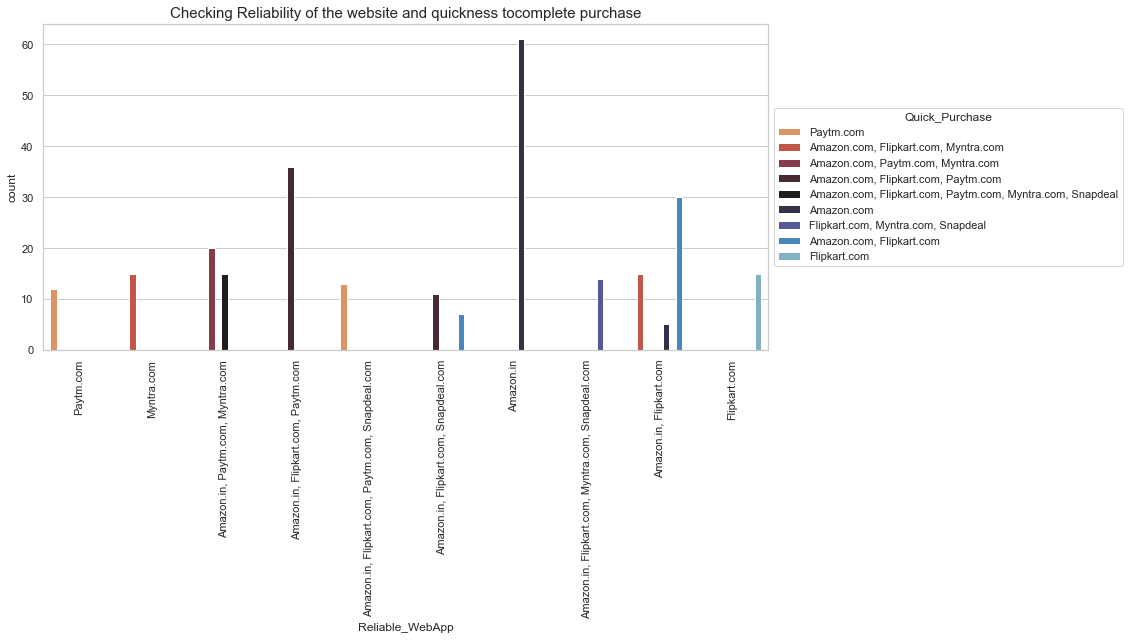

In [195]:
# Checking Reliability of the website and quickness to complete purchase
plt.figure(figsize=(13,6))
plt.title('Checking Reliability of the website and quickness tocomplete purchase',fontsize=15)
sns.countplot(x='Reliable_WebApp',hue='Quick_Purchase',palette="icefire_r",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Quick_Purchase")
plt.show()

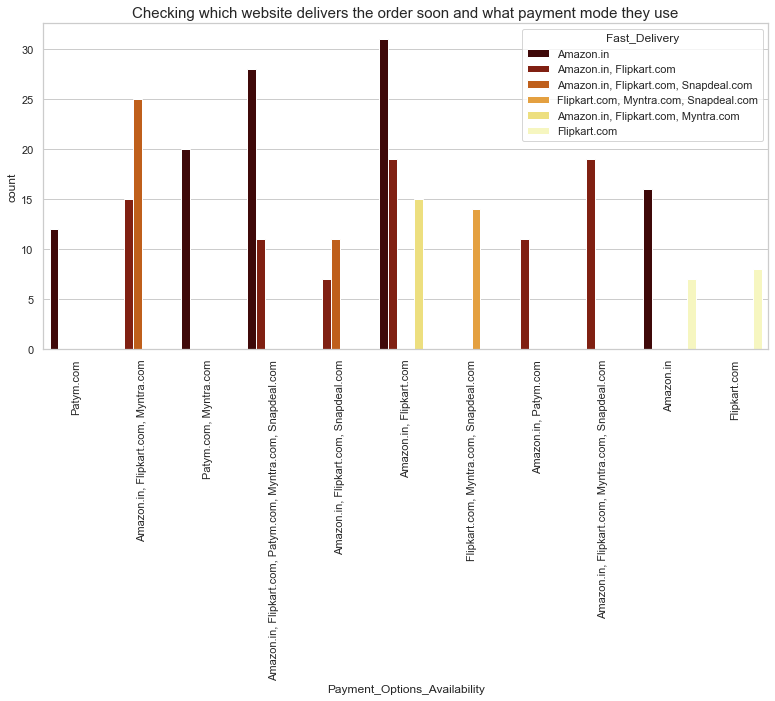

In [196]:
# Checking which website delivers the order soon and what payment mode they use
plt.figure(figsize=(13,6))
plt.title('Checking which website delivers the order soon and what payment mode they use',fontsize=15)
sns.countplot(x='Payment_Options_Availability',hue='Fast_Delivery',palette="afmhot",data=df);
plt.xticks(rotation=90)
plt.legend(loc ="upper right",title="Fast_Delivery")
plt.show()

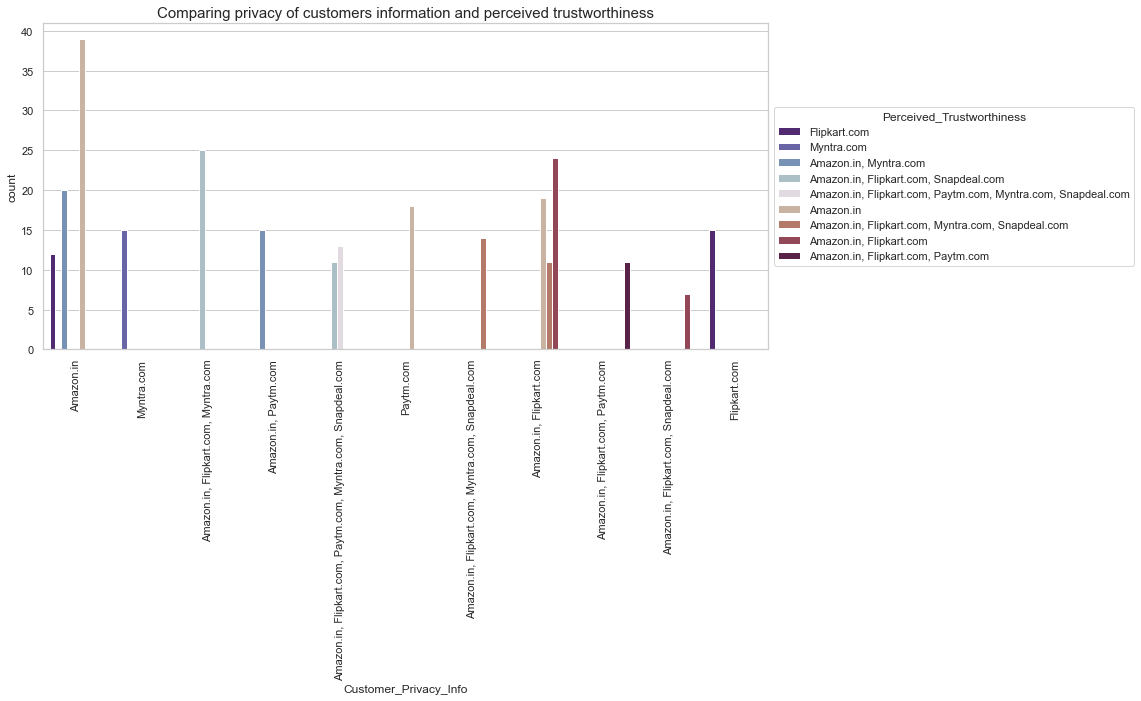

In [197]:
# Comparing privacy of customers information and perceived trustworthiness
plt.figure(figsize=(13,6))
plt.title('Comparing privacy of customers information and perceived trustworthiness',fontsize=15)
sns.countplot(x='Customer_Privacy_Info',hue='Perceived_Trustworthiness',palette="twilight_shifted",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Perceived_Trustworthiness")
plt.show()

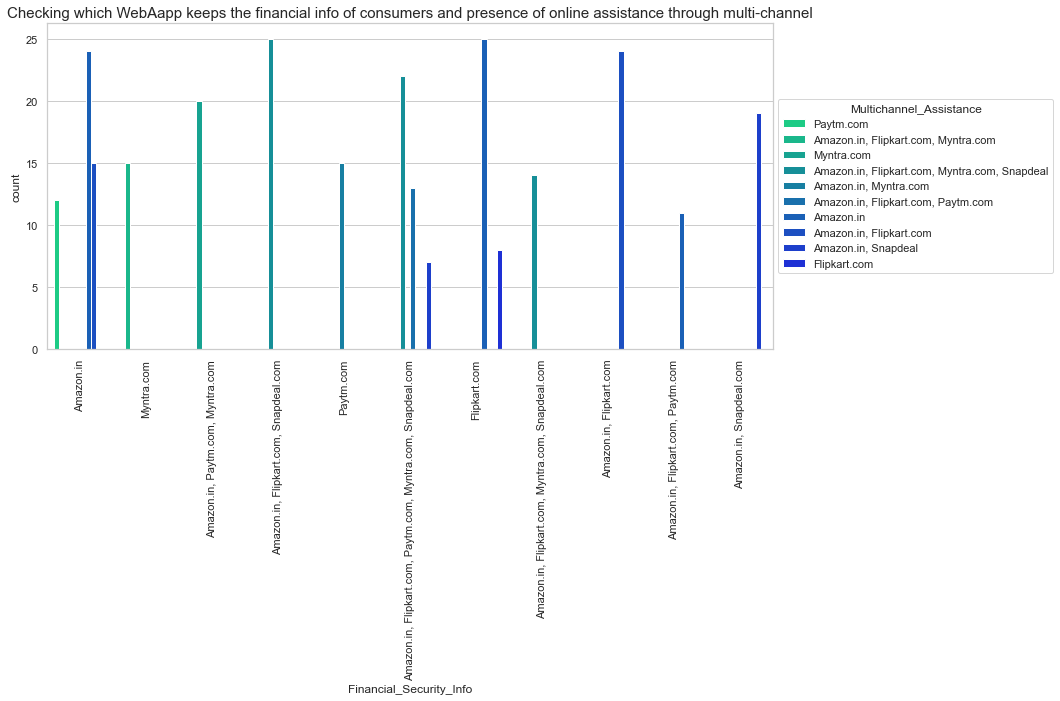

In [198]:
# Comparing privacy of customers information and perceived trustworthiness
plt.figure(figsize=(13,6))
plt.title('Checking which WebAapp keeps the financial info of consumers and presence of online assistance through multi-channel',fontsize=15)
sns.countplot(x='Financial_Security_Info',hue='Multichannel_Assistance',palette="winter_r",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Multichannel_Assistance")
plt.show()

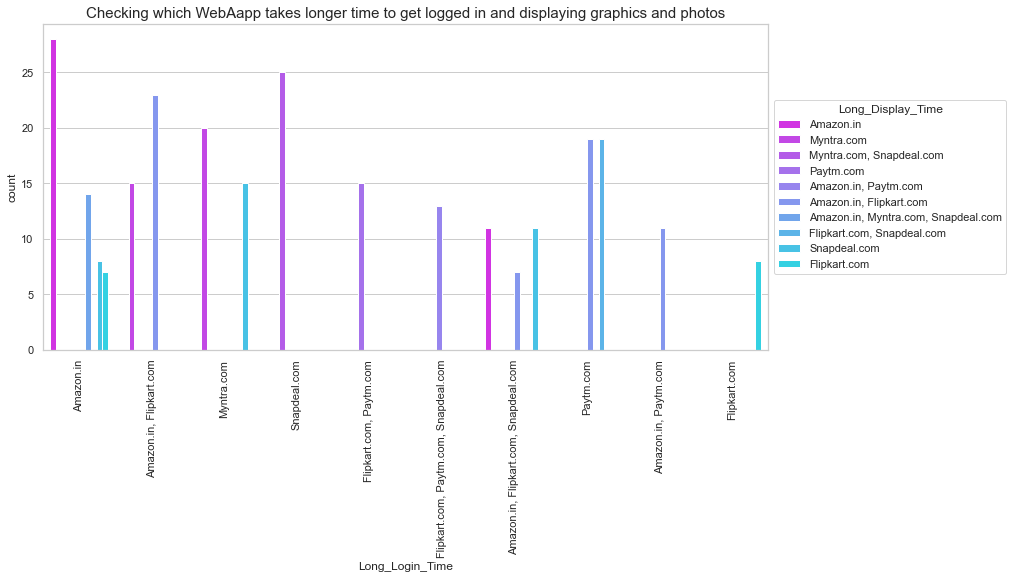

In [199]:
# Comparing Long_Login_Time and Long_Display_Time
plt.figure(figsize=(13,6))
plt.title('Checking which WebAapp takes longer time to get logged in and displaying graphics and photos',fontsize=15)
sns.countplot(x='Long_Login_Time',hue='Long_Display_Time',palette="cool_r",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Long_Display_Time")
plt.show()

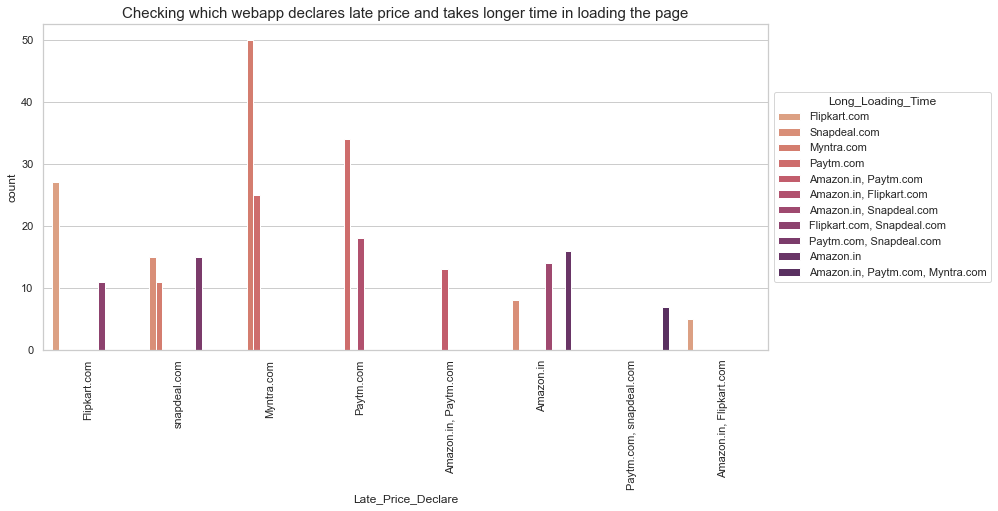

In [200]:
# Comparing Late_Price_Declare and Long_Loading_Time
plt.figure(figsize=(13,6))
plt.title('Checking which webapp declares late price and takes longer time in loading the page',fontsize=15)
sns.countplot(x='Late_Price_Declare',hue='Long_Loading_Time',palette="flare",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Long_Loading_Time")
plt.show()

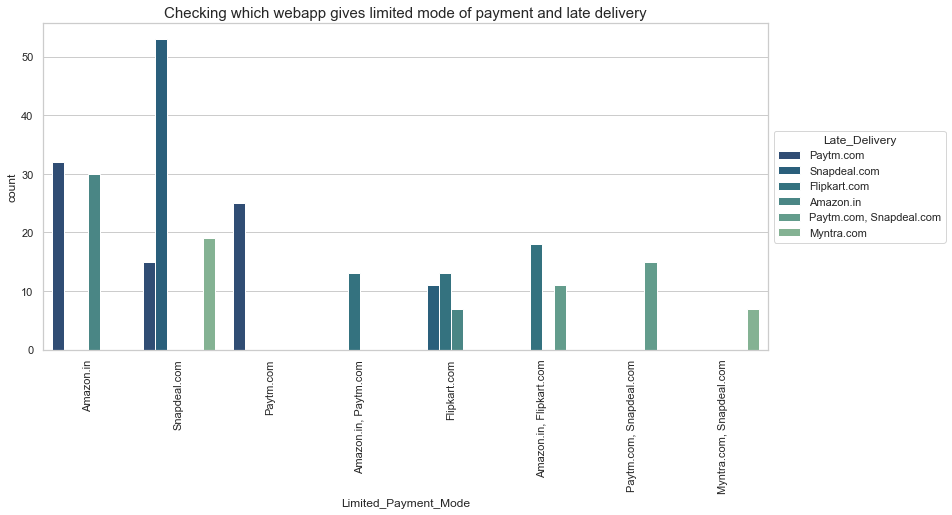

In [201]:
# Comparing Late_Price_Declare and Long_Loading_Time
plt.figure(figsize=(13,6))
plt.title('Checking which webapp gives limited mode of payment and late delivery',fontsize=15)
sns.countplot(x='Limited_Payment_Mode',hue='Late_Delivery',palette="crest_r",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Late_Delivery")
plt.show()

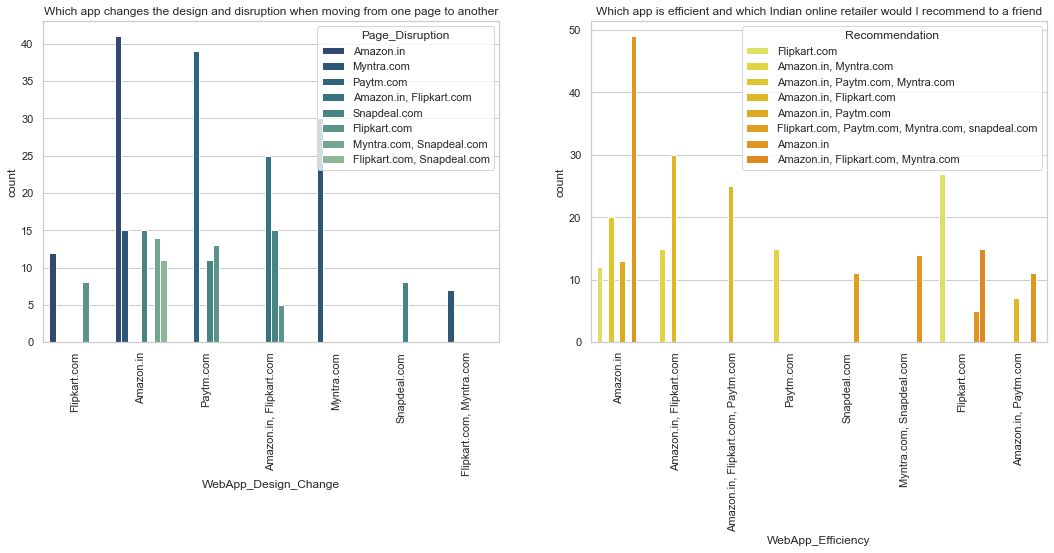

In [202]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Which app changes the design and disruption when moving from one page to another')
sns.countplot(x='WebApp_Design_Change',hue='Page_Disruption',palette="crest_r",data=df);
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Which app is efficient and which Indian online retailer would I recommend to a friend')
sns.countplot(x='WebApp_Efficiency',hue='Recommendation',palette="Wistia",data=df);
plt.xticks(rotation=90)

plt.subplot(2,2,1).legend(loc='upper right',title="Page_Disruption");
plt.subplot(2,2,2).legend(loc ="upper right",title="Recommendation");
plt.show()

# Taking care of categorical columns using label encoding method

In [203]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=LE.fit_transform(df[i])

In [204]:
# Checking the dataframe after encoding
df.head()

Gender  Age  Shopping_City  Pincode  Shopping_Since  Shopping_Frequency  \
0       1    1              2   110009               3                   2   
1       0    0              2   110030               3                   3   
2       0    0              4   201308               2                   3   
3       1    0              6   132001               2                   5   
4       0    0              0   530068               1                   0   

   Internet_Accessibility  Device_Used  Screen_Size  OS  ...  Long_Login_Time  \
0                       0            0            3   2  ...                0   
1                       3            2            0   1  ...                1   
2                       1            2            2   0  ...                7   
3                       1            2            2   1  ...                9   
4                       3            2            0   1  ...                5   

   Long_Display_Time  Late_Price_Declare  Long_Loading_Time  \
0                  0                   3                  5   
1                  6                   7                 10   
2                  6                   4                  7   
3                  7                   4                  8   
4                  8                   5                  8   

   Limited_Payment_Mode  Late_Delivery  WebApp_Design_Change  Page_Disruption  \
0                     0              3                     2                0   
1                     7              5                     0                4   
2                     0              3                     5                6   
3                     5              3                     1                1   
4                     7              3                     0                7   

   WebApp_Efficiency  Recommendation  
0                  0               6  
1                  1               3  
2                  0               5  
3                  2               1  
4                  6               3  

[5 rows x 71 columns]

In [206]:
# Checking statistical summary of the dataset
df.describe().T

count           mean            std       min       25%  \
Gender                269.0       0.327138       0.470042       0.0       0.0   
Age                   269.0       1.330855       1.183774       0.0       0.0   
Shopping_City         269.0       4.494424       3.187687       0.0       2.0   
Pincode               269.0  220465.747212  140524.341051  110008.0  122018.0   
Shopping_Since        269.0       2.323420       1.176357       0.0       1.0   
...                     ...            ...            ...       ...       ...   
Late_Delivery         269.0       2.736059       1.725857       0.0       1.0   
WebApp_Design_Change  269.0       2.189591       2.152169       0.0       0.0   
Page_Disruption       269.0       3.587361       2.557690       0.0       1.0   
WebApp_Efficiency     269.0       2.133829       2.171029       0.0       0.0   
Recommendation        269.0       2.397770       2.362991       0.0       0.0   

                           50%       75%       max  
Gender                     0.0       1.0       1.0  
Age                        1.0       2.0       4.0  
Shopping_City              4.0       7.0      10.0  
Pincode               201303.0  201310.0  560037.0  
Shopping_Since             3.0       3.0       4.0  
...                        ...       ...       ...  
Late_Delivery              3.0       4.0       5.0  
WebApp_Design_Change       1.0       5.0       6.0  
Page_Disruption            4.0       6.0       7.0  
WebApp_Efficiency          1.0       4.0       7.0  
Recommendation             1.0       5.0       7.0  

[71 rows x 8 columns]

# Identifying the outliers

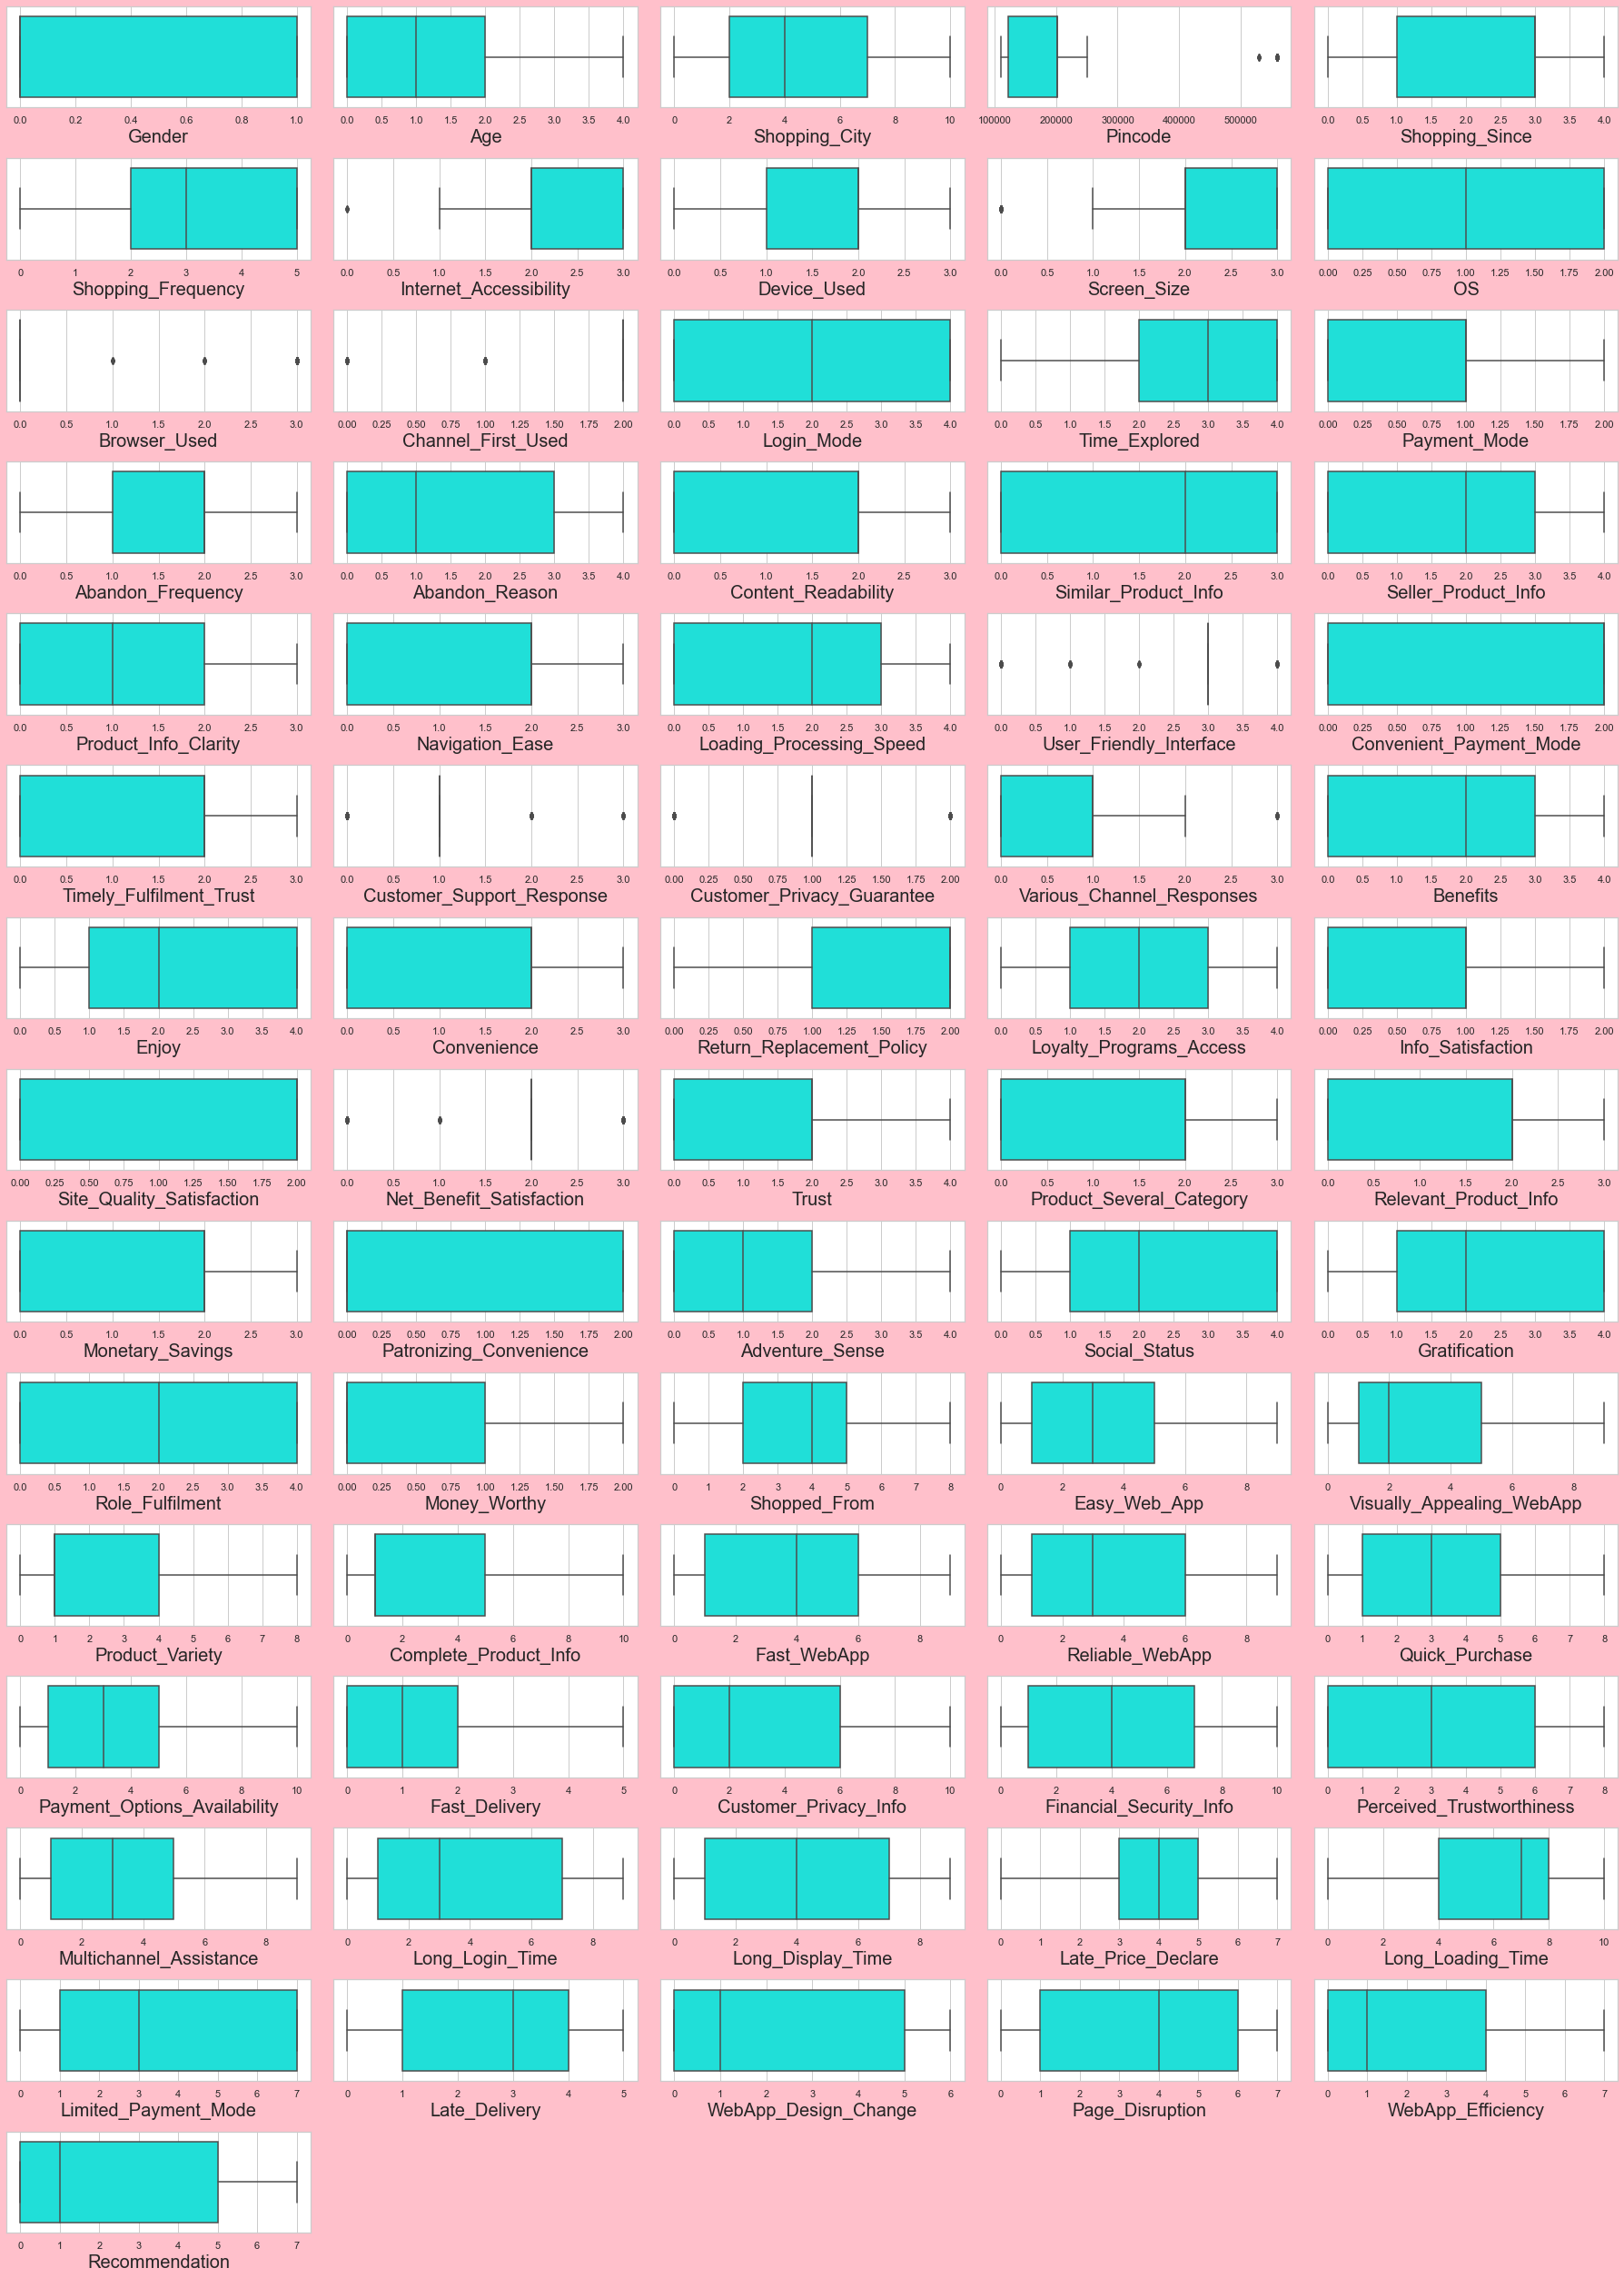

In [210]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(25,35),facecolor='pink')
plotnumber=1
for column in df:
    if plotnumber<=71:
        ax=plt.subplot(15,5,plotnumber)
        sns.boxplot(df[column],palette="hsv")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Checking skewness in the data

In [211]:
# Checking the skewness
df.skew()

Gender                  0.741028
Age                     0.680987
Shopping_City           0.313729
Pincode                 1.748322
Shopping_Since         -0.276968
                          ...   
Late_Delivery          -0.147702
WebApp_Design_Change    0.354163
Page_Disruption        -0.100608
WebApp_Efficiency       0.662084
Recommendation          0.583614
Length: 71, dtype: float64

In [212]:
df.skew().sort_values()

Channel_First_Used          -2.469485
Screen_Size                 -1.308503
Return_Replacement_Policy   -1.305697
User_Friendly_Interface     -1.270908
Abandon_Frequency           -0.867449
                               ...   
Customer_Support_Response    1.105678
Various_Channel_Responses    1.119422
Product_Variety              1.186071
Browser_Used                 1.710244
Pincode                      1.748322
Length: 71, dtype: float64

# Checking Correlation between the independent variables

In [213]:
# Checking the correlation between features and the target
cor = df.corr()
cor

Gender       Age  Shopping_City   Pincode  \
Gender                1.000000  0.046169       0.080912 -0.260365   
Age                   0.046169  1.000000       0.113712 -0.120704   
Shopping_City         0.080912  0.113712       1.000000 -0.416597   
Pincode              -0.260365 -0.120704      -0.416597  1.000000   
Shopping_Since       -0.057096 -0.087847      -0.138329 -0.090049   
...                        ...       ...            ...       ...   
Late_Delivery         0.060838 -0.156173      -0.123369 -0.078660   
WebApp_Design_Change -0.164818 -0.134558       0.000427 -0.058715   
Page_Disruption      -0.256638 -0.018825       0.019167  0.039936   
WebApp_Efficiency     0.055663 -0.008582       0.007117  0.037662   
Recommendation       -0.003372 -0.135263      -0.142123 -0.045388   

                      Shopping_Since  Shopping_Frequency  \
Gender                     -0.057096            0.077876   
Age                        -0.087847            0.309575   
Shopping_City              -0.138329            0.173871   
Pincode                    -0.090049           -0.263685   
Shopping_Since              1.000000            0.013315   
...                              ...                 ...   
Late_Delivery               0.218641           -0.130651   
WebApp_Design_Change        0.220347            0.007841   
Page_Disruption             0.025919           -0.127148   
WebApp_Efficiency          -0.024316           -0.124076   
Recommendation              0.136106           -0.152028   

                      Internet_Accessibility  Device_Used  Screen_Size  \
Gender                             -0.309029     0.061673     0.028794   
Age                                 0.255594     0.022383    -0.006101   
Shopping_City                      -0.010436     0.020650     0.199296   
Pincode                             0.005511    -0.004980    -0.211198   
Shopping_Since                      0.226883    -0.125240     0.139924   
...                                      ...          ...          ...   
Late_Delivery                       0.101297    -0.104665     0.048533   
WebApp_Design_Change                0.147770    -0.052146     0.418180   
Page_Disruption                     0.349813     0.084876    -0.065658   
WebApp_Efficiency                   0.266932     0.333868    -0.100462   
Recommendation                      0.041129     0.099425     0.074453   

                            OS  ...  Long_Login_Time  Long_Display_Time  \
Gender               -0.019243  ...        -0.101925          -0.228744   
Age                  -0.048087  ...        -0.281877          -0.095850   
Shopping_City        -0.051642  ...        -0.065450          -0.115453   
Pincode              -0.053901  ...        -0.085194           0.089605   
Shopping_Since        0.274201  ...         0.154763          -0.063386   
...                        ...  ...              ...                ...   
Late_Delivery         0.397953  ...         0.268484           0.365030   
WebApp_Design_Change  0.059894  ...         0.370649           0.152655   
Page_Disruption       0.111380  ...         0.274454           0.603750   
WebApp_Efficiency    -0.128611  ...         0.122555          -0.010967   
Recommendation       -0.159579  ...         0.261774          -0.140519   

                      Late_Price_Declare  Long_Loading_Time  \
Gender                         -0.061374           0.008289   
Age                            -0.064601          -0.128064   
Shopping_City                  -0.293441          -0.104340   
Pincode                        -0.070046          -0.026817   
Shopping_Since                  0.305533           0.086616   
...                                  ...                ...   
Late_Delivery                   0.598200           0.797480   
WebApp_Design_Change            0.035417           0.225618   
Page_Disruption                 0.332032           0.614528   
WebApp_Efficiency               0.123087           0.3

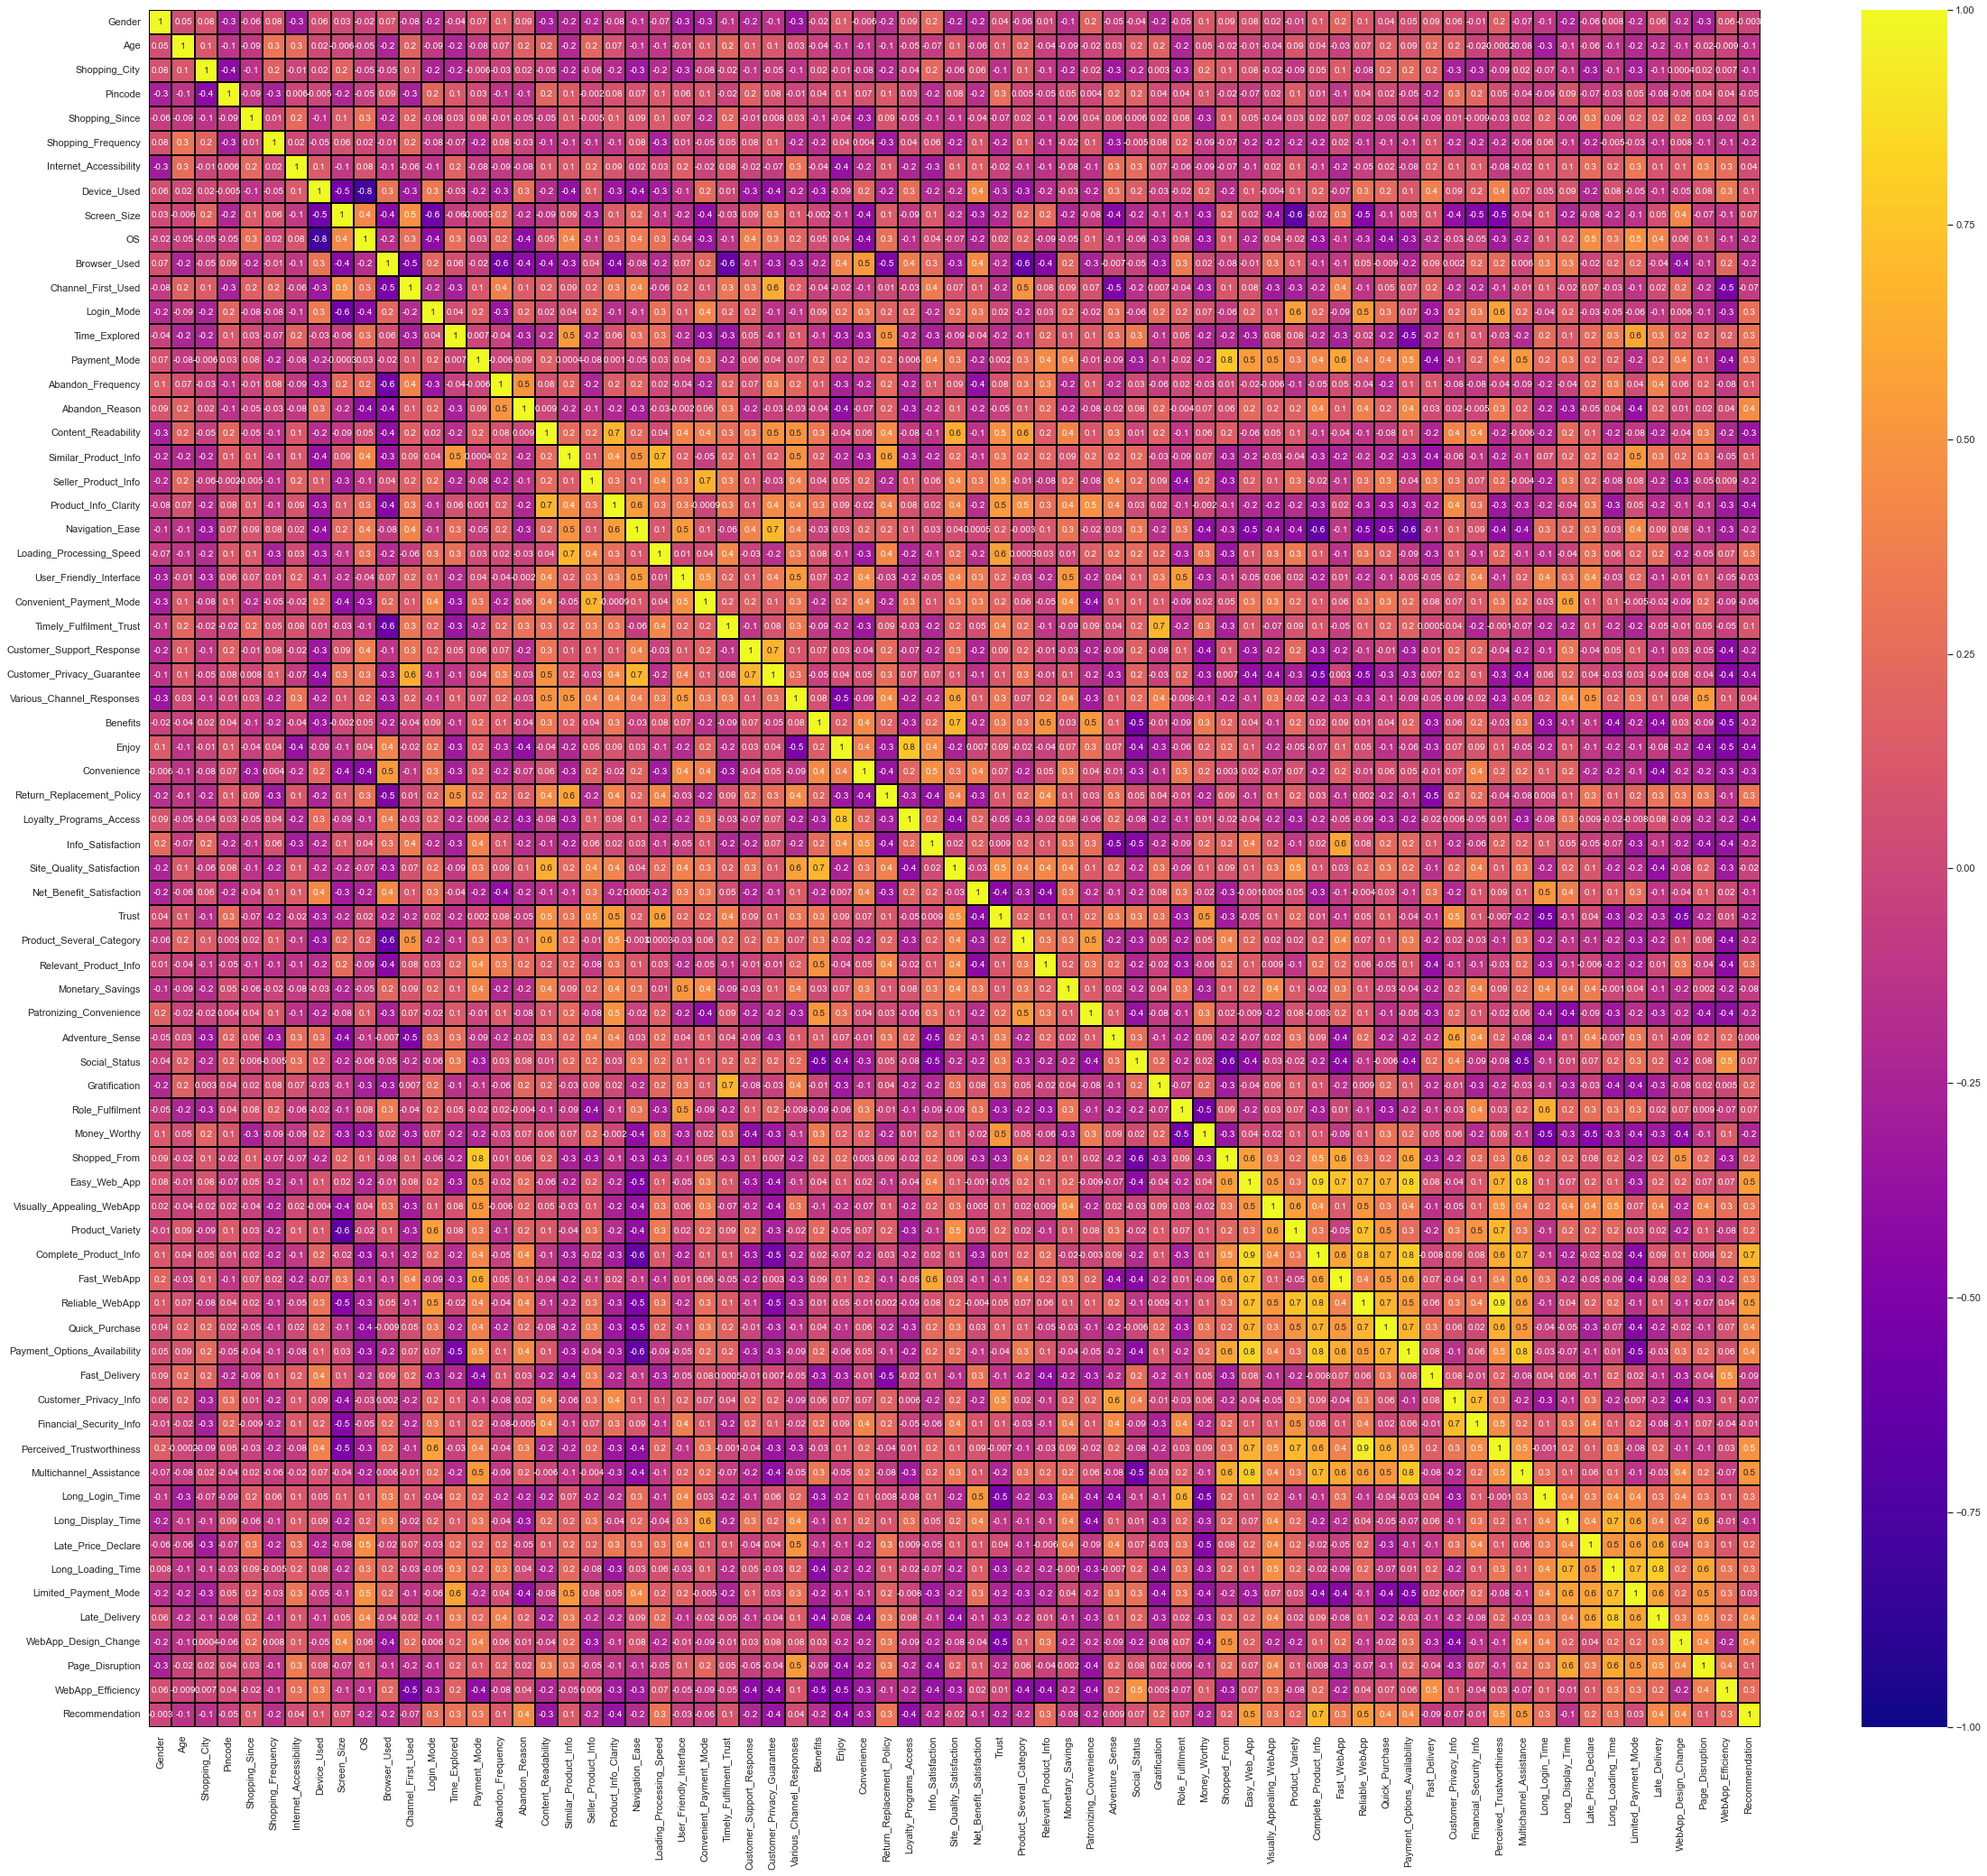

In [214]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(40,35))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="plasma")
plt.yticks(rotation=0);
